# Telecom Churn Case Study

In [2]:
#Importing the necessary libraries.
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.preprocessing import PowerTransformer, StandardScaler, MinMaxScaler
from scipy.stats import norm, skew
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, recall_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
import xgboost as xgb
from sklearn.utils import class_weight
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.metrics import accuracy_score
import statsmodels.api as sm
from sklearn.tree import DecisionTreeClassifier

%matplotlib inline
pd.options.display.float_format = '{:.2f}'.format

#Suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Expanding the visible columns and rows to 500 so as to see all rows and columns
pd.set_option('display.max_rows', 500, 'display.max_columns', 500)
pd.set_option('max_info_column',500)

In [4]:
#Reading the data into a dataframe df_tele_churn.
df_tele_churn = pd.read_csv("telecom_churn_data.csv")
df_tele_churn.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.00,0.00,0.00,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.38,214.82,213.80,21.10,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,0.00,0.00,0.00,0.00,nan,nan,0.16,nan,nan,nan,4.13,nan,nan,nan,1.15,nan,nan,nan,5.44,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,0.00,0.00,5.44,0.00,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,na

## Data Understanding

In [5]:
#Shape
print (df_tele_churn.shape)

(99999, 226)


In [6]:
#Info
df_tele_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
mobile_number               99999 non-null int64
circle_id                   99999 non-null int64
loc_og_t2o_mou              98981 non-null float64
std_og_t2o_mou              98981 non-null float64
loc_ic_t2o_mou              98981 non-null float64
last_date_of_month_6        99999 non-null object
last_date_of_month_7        99398 non-null object
last_date_of_month_8        98899 non-null object
last_date_of_month_9        98340 non-null object
arpu_6                      99999 non-null float64
arpu_7                      99999 non-null float64
arpu_8                      99999 non-null float64
arpu_9                      99999 non-null float64
onnet_mou_6                 96062 non-null float64
onnet_mou_7                 96140 non-null float64
onnet_mou_8                 94621 non-null float64
onnet_mou_9                 92254 non-null float64
offnet_mou_6                960

In [7]:
#Describe
df_tele_churn.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,99999.00,99999.00,98981.00,98981.00,98981.00,99999.00,99999.00,99999.00,99999.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,99999.00,99999.00,99999.00,99999.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.

In [8]:
#Unique values
df_tele_churn.nunique().sort_values()

std_ic_t2o_mou_6                1
std_og_t2c_mou_8                1
std_og_t2c_mou_9                1
std_ic_t2o_mou_9                1
std_ic_t2o_mou_8                1
std_og_t2c_mou_7                1
std_ic_t2o_mou_7                1
last_date_of_month_9            1
std_og_t2c_mou_6                1
last_date_of_month_7            1
circle_id                       1
loc_og_t2o_mou                  1
std_og_t2o_mou                  1
loc_ic_t2o_mou                  1
last_date_of_month_8            1
last_date_of_month_6            1
night_pck_user_7                2
night_pck_user_8                2
night_pck_user_9                2
night_pck_user_6                2
fb_user_9                       2
fb_user_8                       2
fb_user_7                       2
fb_user_6                       2
monthly_2g_9                    5
monthly_2g_6                    5
monthly_2g_7                    6
monthly_2g_8                    6
monthly_3g_9                   11
monthly_3g_6  

## DATA CLEANING 
### Dropping unnecessary columns mobile_number and circle_id as they don't add any information

In [9]:
#Dropping unnecessary columns.
cols_drop = ['mobile_number','circle_id']

df_tele_churn.drop(cols_drop, axis=1, inplace=True)
df_tele_churn.shape

(99999, 224)

### Handling Missing Values

In [10]:
#Missing value percentages stored in dataframe.
columns = df_tele_churn.columns
percent_missing = df_tele_churn.isnull().sum() * 100 / len(df_tele_churn)
missing_value_df = percent_missing.reset_index()
missing_value_df.columns = ['column_name','percent_missing']
missing_value_df

,column_name,percent_missing
0,loc_og_t2o_mou,1.02
1,std_og_t2o_mou,1.02
2,loc_ic_t2o_mou,1.02
3,last_date_of_month_6,0.00
4,last_date_of_month_7,0.60
5,last_date_of_month_8,1.10
6,last_date_of_month_9,1.66
7,arpu_6,0.00
8,arpu_7,0.00
9,arpu_8,0.00


### Checking if missing values are MCAR, MAR or MNAR

In [11]:
print('Number of missing columns in recharge columns in Month 6 when total_rech_data_6 is missing')
print(df_tele_churn[df_tele_churn['total_rech_data_6'].isna()][['total_rech_data_6','date_of_last_rech_data_6','arpu_3g_6','arpu_2g_6','night_pck_user_6','max_rech_data_6','fb_user_6','av_rech_amt_data_6','count_rech_2g_6','count_rech_3g_6']].isna().sum())

print('Number of missing columns in recharge columns in Month 7 when total_rech_data_7 is missing')
print(df_tele_churn[df_tele_churn['total_rech_data_7'].isna()][['total_rech_data_7','date_of_last_rech_data_7','arpu_3g_7','arpu_2g_7','night_pck_user_7','max_rech_data_7','fb_user_7','av_rech_amt_data_7','count_rech_2g_7','count_rech_3g_7']].isna().sum())

print('Number of missing columns in recharge columns in Month 8 when total_rech_data_8 is missing')
print(df_tele_churn[df_tele_churn['total_rech_data_8'].isna()][['total_rech_data_8','date_of_last_rech_data_8','arpu_3g_8','arpu_2g_8','night_pck_user_8','max_rech_data_8','fb_user_8','av_rech_amt_data_8','count_rech_2g_8','count_rech_3g_8']].isna().sum())

print('Number of missing columns in recharge columns in Month 9 when total_rech_data_9 is missing')
print(df_tele_churn[df_tele_churn['total_rech_data_9'].isna()][['total_rech_data_9','date_of_last_rech_data_9','arpu_3g_9','arpu_2g_9','night_pck_user_9','max_rech_data_9','fb_user_9','av_rech_amt_data_9','count_rech_2g_9','count_rech_3g_9']].isna().sum())

Number of missing columns in recharge columns in Month 6 when total_rech_data_6 is missing
total_rech_data_6           74846
date_of_last_rech_data_6    74846
arpu_3g_6                   74846
arpu_2g_6                   74846
night_pck_user_6            74846
max_rech_data_6             74846
fb_user_6                   74846
av_rech_amt_data_6          74846
count_rech_2g_6             74846
count_rech_3g_6             74846
dtype: int64
Number of missing columns in recharge columns in Month 7 when total_rech_data_7 is missing
total_rech_data_7           74428
date_of_last_rech_data_7    74428
arpu_3g_7                   74428
arpu_2g_7                   74428
night_pck_user_7            74428
max_rech_data_7             74428
fb_user_7                   74428
av_rech_amt_data_7          74428
count_rech_2g_7             74428
count_rech_3g_7             74428
dtype: int64
Number of missing columns in recharge columns in Month 8 when total_rech_data_8 is missing
total_rech_data_8    

#### We can see that all these columns have the same rows with missing data, hence these are columns with missing values missing not ata random(MNAR). 
#### All these columns are missing when customers haven't done any recharge, hence we can fill these missing values with zero.

In [12]:
print('Number of missing columns in service usage columns in Month 6 when onnet_mou_6 is missing')
print(df_tele_churn[df_tele_churn['onnet_mou_6'].isna()][['onnet_mou_6','offnet_mou_6','roam_ic_mou_6','roam_og_mou_6','loc_og_t2t_mou_6','loc_og_t2m_mou_6','loc_og_t2f_mou_6','loc_og_t2c_mou_6','loc_og_mou_6','std_og_t2t_mou_6',
                                                          'std_og_t2m_mou_6','std_og_t2f_mou_6','std_og_t2c_mou_6','std_og_mou_6']].isna().sum())

print('Number of missing columns in service usage columns in Month 7 when onnet_mou_7 is missing')
print(df_tele_churn[df_tele_churn['onnet_mou_7'].isna()][['onnet_mou_7','offnet_mou_7','roam_ic_mou_7','roam_og_mou_7','loc_og_t2t_mou_7','loc_og_t2m_mou_7','loc_og_t2f_mou_7','loc_og_t2c_mou_7','loc_og_mou_7','std_og_t2t_mou_7',
                                                          'std_og_t2m_mou_7','std_og_t2f_mou_7','std_og_t2c_mou_7','std_og_mou_7']].isna().sum())

print('Number of missing columns in service usage columns in Month 8 when onnet_mou_8 is missing')
print(df_tele_churn[df_tele_churn['onnet_mou_8'].isna()][['onnet_mou_8','offnet_mou_8','roam_ic_mou_8','roam_og_mou_8','loc_og_t2t_mou_8','loc_og_t2m_mou_8','loc_og_t2f_mou_8','loc_og_t2c_mou_8','loc_og_mou_8','std_og_t2t_mou_8',
                                                          'std_og_t2m_mou_8','std_og_t2f_mou_8','std_og_t2c_mou_8','std_og_mou_8']].isna().sum())

print('Number of missing columns in service usage columns in Month 9 when onnet_mou_9 is missing')
print(df_tele_churn[df_tele_churn['onnet_mou_9'].isna()][['onnet_mou_9','offnet_mou_9','roam_ic_mou_9','roam_og_mou_9','loc_og_t2t_mou_9','loc_og_t2m_mou_9','loc_og_t2f_mou_9','loc_og_t2c_mou_9','loc_og_mou_9','std_og_t2t_mou_9',
                                                          'std_og_t2m_mou_9','std_og_t2f_mou_9','std_og_t2c_mou_9','std_og_mou_9']].isna().sum())

Number of missing columns in service usage columns in Month 6 when onnet_mou_6 is missing
onnet_mou_6         3937
offnet_mou_6        3937
roam_ic_mou_6       3937
roam_og_mou_6       3937
loc_og_t2t_mou_6    3937
loc_og_t2m_mou_6    3937
loc_og_t2f_mou_6    3937
loc_og_t2c_mou_6    3937
loc_og_mou_6        3937
std_og_t2t_mou_6    3937
std_og_t2m_mou_6    3937
std_og_t2f_mou_6    3937
std_og_t2c_mou_6    3937
std_og_mou_6        3937
dtype: int64
Number of missing columns in service usage columns in Month 7 when onnet_mou_7 is missing
onnet_mou_7         3859
offnet_mou_7        3859
roam_ic_mou_7       3859
roam_og_mou_7       3859
loc_og_t2t_mou_7    3859
loc_og_t2m_mou_7    3859
loc_og_t2f_mou_7    3859
loc_og_t2c_mou_7    3859
loc_og_mou_7        3859
std_og_t2t_mou_7    3859
std_og_t2m_mou_7    3859
std_og_t2f_mou_7    3859
std_og_t2c_mou_7    3859
std_og_mou_7        3859
dtype: int64
Number of missing columns in service usage columns in Month 8 when onnet_mou_8 is missing
onne

#### All these columns have the same rows with missing values.
#### These columns are missing when customers haven't used the service, hence we can replace these columns with zero.

In [13]:
print('Number of missing columns in service usage columns when loc_og_t2o_mou is missing')
print(df_tele_churn[df_tele_churn['loc_og_t2o_mou'].isna()][['loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou']].isna().sum())

Number of missing columns in service usage columns when loc_og_t2o_mou is missing
loc_og_t2o_mou    1018
std_og_t2o_mou    1018
loc_ic_t2o_mou    1018
dtype: int64


#### Similar to above case, these columns are also missing data, due to lack of service usage. Hence we can replace these missing values with zero.
### Therefore all the missing numeric values can be replaced with zero.

### For the date columns we will replace the last_date_of_month columns with the last date of the month, for the date_of_last_rech and date_of_last_rech_data columns we will replace with first date of the month.

In [14]:
#Replacing missing values with last date of the month.
df_tele_churn['last_date_of_month_6'][df_tele_churn.last_date_of_month_6.isnull()] = '6/30/2014'
df_tele_churn['last_date_of_month_7'][df_tele_churn.last_date_of_month_7.isnull()] = '7/31/2014'
df_tele_churn['last_date_of_month_8'][df_tele_churn.last_date_of_month_8.isnull()] = '8/31/2014'
df_tele_churn['last_date_of_month_9'][df_tele_churn.last_date_of_month_9.isnull()] = '9/30/2014'

#Replacing missing values with first day of the month.
df_tele_churn['date_of_last_rech_6'][df_tele_churn.date_of_last_rech_6.isnull()] = '6/1/2014'
df_tele_churn['date_of_last_rech_7'][df_tele_churn.date_of_last_rech_7.isnull()] = '7/1/2014'
df_tele_churn['date_of_last_rech_8'][df_tele_churn.date_of_last_rech_8.isnull()] = '8/1/2014'
df_tele_churn['date_of_last_rech_9'][df_tele_churn.date_of_last_rech_9.isnull()] = '9/1/2014'

#Replacing missing values with first day of the month.
df_tele_churn['date_of_last_rech_data_6'][df_tele_churn.date_of_last_rech_data_6.isnull()] = '6/1/2014'
df_tele_churn['date_of_last_rech_data_7'][df_tele_churn.date_of_last_rech_data_7.isnull()] = '7/1/2014'
df_tele_churn['date_of_last_rech_data_8'][df_tele_churn.date_of_last_rech_data_8.isnull()] = '8/1/2014'
df_tele_churn['date_of_last_rech_data_9'][df_tele_churn.date_of_last_rech_data_9.isnull()] = '9/1/2014'

### Replacing all the missing numeric columns with zero.

In [15]:
# Replacing all numeric missing values with zero.
df_tele_churn = df_tele_churn.fillna(0)
df_tele_churn.isnull().sum()

loc_og_t2o_mou              0
std_og_t2o_mou              0
loc_ic_t2o_mou              0
last_date_of_month_6        0
last_date_of_month_7        0
last_date_of_month_8        0
last_date_of_month_9        0
arpu_6                      0
arpu_7                      0
arpu_8                      0
arpu_9                      0
onnet_mou_6                 0
onnet_mou_7                 0
onnet_mou_8                 0
onnet_mou_9                 0
offnet_mou_6                0
offnet_mou_7                0
offnet_mou_8                0
offnet_mou_9                0
roam_ic_mou_6               0
roam_ic_mou_7               0
roam_ic_mou_8               0
roam_ic_mou_9               0
roam_og_mou_6               0
roam_og_mou_7               0
roam_og_mou_8               0
roam_og_mou_9               0
loc_og_t2t_mou_6            0
loc_og_t2t_mou_7            0
loc_og_t2t_mou_8            0
loc_og_t2t_mou_9            0
loc_og_t2m_mou_6            0
loc_og_t2m_mou_7            0
loc_og_t2m

### Converting Date String to Days

In [16]:
#Converting the date string to datetime.

#Storing all the date columns in a list.
date_cols = [x for x in df_tele_churn.columns if 'date' in x]   

#Iterating through the list and converting the columns to datetime.
for i in date_cols:
    df_tele_churn[i] = pd.to_datetime(df_tele_churn[i], format="%m/%d/%Y")
df_tele_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 224 columns):
loc_og_t2o_mou              99999 non-null float64
std_og_t2o_mou              99999 non-null float64
loc_ic_t2o_mou              99999 non-null float64
last_date_of_month_6        99999 non-null datetime64[ns]
last_date_of_month_7        99999 non-null datetime64[ns]
last_date_of_month_8        99999 non-null datetime64[ns]
last_date_of_month_9        99999 non-null datetime64[ns]
arpu_6                      99999 non-null float64
arpu_7                      99999 non-null float64
arpu_8                      99999 non-null float64
arpu_9                      99999 non-null float64
onnet_mou_6                 99999 non-null float64
onnet_mou_7                 99999 non-null float64
onnet_mou_8                 99999 non-null float64
onnet_mou_9                 99999 non-null float64
offnet_mou_6                99999 non-null float64
offnet_mou_7                99999 non-null flo

In [17]:
#Converting datetime to days.

#Subtrating last_date_of_month with date_of_last_rech and extracting the days.
df_tele_churn['last_rech_days_6'] = (df_tele_churn['last_date_of_month_6']-df_tele_churn['date_of_last_rech_6']).dt.days
df_tele_churn['last_rech_days_7'] = (df_tele_churn['last_date_of_month_7']-df_tele_churn['date_of_last_rech_7']).dt.days
df_tele_churn['last_rech_days_8'] = (df_tele_churn['last_date_of_month_8']-df_tele_churn['date_of_last_rech_8']).dt.days
df_tele_churn['last_rech_days_9'] = (df_tele_churn['last_date_of_month_9']-df_tele_churn['date_of_last_rech_9']).dt.days

#Subtrating last_date_of_month with date_of_last_rech_data and extracting the days.
df_tele_churn['last_rech_data_days_6'] = (df_tele_churn['last_date_of_month_6']-df_tele_churn['date_of_last_rech_data_6']).dt.days
df_tele_churn['last_rech_data_days_7'] = (df_tele_churn['last_date_of_month_7']-df_tele_churn['date_of_last_rech_data_7']).dt.days
df_tele_churn['last_rech_data_days_8'] = (df_tele_churn['last_date_of_month_8']-df_tele_churn['date_of_last_rech_data_8']).dt.days
df_tele_churn['last_rech_data_days_9'] = (df_tele_churn['last_date_of_month_9']-df_tele_churn['date_of_last_rech_data_9']).dt.days

#Dropping the date columns.
df_tele_churn.drop(date_cols, axis=1, inplace=True)
df_tele_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 220 columns):
loc_og_t2o_mou           99999 non-null float64
std_og_t2o_mou           99999 non-null float64
loc_ic_t2o_mou           99999 non-null float64
arpu_6                   99999 non-null float64
arpu_7                   99999 non-null float64
arpu_8                   99999 non-null float64
arpu_9                   99999 non-null float64
onnet_mou_6              99999 non-null float64
onnet_mou_7              99999 non-null float64
onnet_mou_8              99999 non-null float64
onnet_mou_9              99999 non-null float64
offnet_mou_6             99999 non-null float64
offnet_mou_7             99999 non-null float64
offnet_mou_8             99999 non-null float64
offnet_mou_9             99999 non-null float64
roam_ic_mou_6            99999 non-null float64
roam_ic_mou_7            99999 non-null float64
roam_ic_mou_8            99999 non-null float64
roam_ic_mou_9            9

### Renaming Columns to follow month convention.

In [18]:
#Renaming columns with month name to month number to follow month convetion.

df_tele_churn.rename(columns={'jun_vbc_3g': 'vbc_3g_6', 'jul_vbc_3g': 'vbc_3g_7', 'aug_vbc_3g': 'vbc_3g_8', 'sep_vbc_3g': 'vbc_3g_9'}, inplace=True)

## Selecting High Value Customers

### We will calculate the average recharge amount in the good phase and select the top 70 percentile as High Value Customers.

In [19]:
#Average of Recharge Amount in 6th and 7th Month
df_tele_churn['av_rech_amt_6n7'] = (df_tele_churn["total_rech_amt_6"] + df_tele_churn["total_rech_amt_7"])/2.0

#70th Percentile of Avg Recharge Amount
pc70_6n7 = np.percentile(df_tele_churn['av_rech_amt_6n7'], 70.0)
print('70 percentile of 6th and 7th months avg recharge amount: ', pc70_6n7)

70 percentile of 6th and 7th months avg recharge amount:  368.5


In [20]:
#Extracting the top 70 percentile customers into df_high_val_cust dataframe.
df_high_val_cust = df_tele_churn[df_tele_churn['av_rech_amt_6n7'] > pc70_6n7]
print('Dataframe Shape after Filtering High Value Customers: ', df_high_val_cust.shape)

Dataframe Shape after Filtering High Value Customers:  (29979, 221)


In [21]:
#Dropping av_rech_amt_6n7
df_high_val_cust.drop('av_rech_amt_6n7', axis=1, inplace=True)

## Creating Churn Variable

### Creating the dependent churn variable using the month 9 columns.

In [22]:
#churned customers (churn=1, else 0) 
#Adding total_ic_mou_9,total_og_mou_9,vol_2g_mb_9,vol_3g_mb_9 and if their sum is 0 then churned(1) else not churned(0)
df_high_val_cust['churn'] = np.where(df_high_val_cust[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']].sum(axis=1) == 0, 1, 0)
df_high_val_cust['churn'].head()

7     1
8     0
13    0
16    0
17    0
Name: churn, dtype: int32

## Remove Unneccassary Columns.

### Removing all Columns from Month 9.

In [23]:
#Select All 9th Month related columns
drop_cols = [col for col in df_high_val_cust.columns if '_9' in col]
print(drop_cols)

#Drop all 9th month columns.
df_high_val_cust.drop(drop_cols, axis=1, inplace=True)

df_high_val_cust.shape

['arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9', 'std_og_t2c_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_t2o_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9', 'last_day_rch_amt_9', 'total_rech_data_9', 'max_rech_data_9', 'count_rech_2g_9', 'count_rech_3g_9', 'av_rech_amt_data_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'arpu_3g_9', 'arpu_2g_9', 'night_pck_user_9', 'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9', 'sachet_3g_9', 'fb_user_9', 'vbc_3g_9', 'last_rech_days_9', 'last_rech_data_days_9']


(29979, 167)

### Remove Columns with only one unique value since they won't add any value.

In [24]:
#List of columns with only 1 unqiue value
col_list = df_high_val_cust.loc[:,df_high_val_cust.apply(pd.Series.nunique) == 1]
col_list.shape

(29979, 9)

In [25]:
#Remove Columns with only 1 unique value
df_high_val_cust = df_high_val_cust.loc[:,df_high_val_cust.apply(pd.Series.nunique) != 1]
df_high_val_cust.shape

(29979, 158)

## Feature Engineering and Selection.

### Reduce the No of Columns by Creating New Meaningful Features
### Create Columns with Average of 6th & 7th Month Since it's a "Good" Phase and Keep the 8th month untouched as it's "Action" Phase.

In [26]:
churn_filtered = df_high_val_cust.copy()

In [27]:
#Getting a list of columns names of each month.
col_list = churn_filtered.filter(regex='_6|_7').columns.str[:-2]
col_list = col_list.unique()
col_list

Index(['arpu', 'onnet_mou', 'offnet_mou', 'roam_ic_mou', 'roam_og_mou',
       'loc_og_t2t_mou', 'loc_og_t2m_mou', 'loc_og_t2f_mou', 'loc_og_t2c_mou',
       'loc_og_mou', 'std_og_t2t_mou', 'std_og_t2m_mou', 'std_og_t2f_mou',
       'std_og_mou', 'isd_og_mou', 'spl_og_mou', 'og_others', 'total_og_mou',
       'loc_ic_t2t_mou', 'loc_ic_t2m_mou', 'loc_ic_t2f_mou', 'loc_ic_mou',
       'std_ic_t2t_mou', 'std_ic_t2m_mou', 'std_ic_t2f_mou', 'std_ic_mou',
       'total_ic_mou', 'spl_ic_mou', 'isd_ic_mou', 'ic_others',
       'total_rech_num', 'total_rech_amt', 'max_rech_amt', 'last_day_rch_amt',
       'total_rech_data', 'max_rech_data', 'count_rech_2g', 'count_rech_3g',
       'av_rech_amt_data', 'vol_2g_mb', 'vol_3g_mb', 'arpu_3g', 'arpu_2g',
       'night_pck_user', 'monthly_2g', 'sachet_2g', 'monthly_3g', 'sachet_3g',
       'fb_user', 'vbc_3g', 'last_rech_days', 'last_rech_data_days'],
      dtype='object')

In [28]:
#Creating new columns with average of month 6 and 7.
for col in col_list:
  avg_col_name = col+"_av67"   #Average columns name.
  col_6 = col+"_6"             #Month 6 column 
  col_7 = col+"_7"             #Month 7 column
  churn_filtered[avg_col_name] = (churn_filtered[col_6] + churn_filtered[col_7])/2

In [29]:
#Dropping month 6 and 7 columns.
print(churn_filtered.shape)
col_list_drop = churn_filtered.filter(regex='_6|_7').columns   #List of month 6 and 7 columns.
churn_filtered.drop(col_list_drop, axis=1, inplace=True)
print(churn_filtered.shape)

(29979, 210)
(29979, 106)


### Calculate difference between "Action Phase" and "Good Phase" months.

Let's derive some variables. The most important feature, in this situation, can be the difference between the 8th month and the previous months. The difference can be in patterns such as usage difference or recharge value difference. Let's calculate difference variable as the difference between 8th month and the average of 6th and 7th month.

In [30]:
print(churn_filtered.shape)

cols_diff_list = ['arpu','onnet_mou','offnet_mou','roam_ic_mou','roam_og_mou','loc_og_mou','std_og_mou','isd_og_mou',
                  'spl_og_mou','total_og_mou','loc_ic_mou','std_ic_mou','isd_ic_mou','spl_ic_mou','total_ic_mou',
                  'total_rech_num','total_rech_amt','max_rech_amt','total_rech_data','max_rech_data','av_rech_amt_data',
                 'vol_2g_mb','vol_3g_mb']

for col in cols_diff_list:
    diff_col = col + "_diff"
    good_col = col + "_av67"
    action_col = col + "_8"
    churn_filtered[diff_col] = churn_filtered[action_col] - churn_filtered[good_col]
print(churn_filtered.shape)

(29979, 106)
(29979, 129)


### Converting columns with low unique values to categorical columns

In [31]:
#Dividing columns to numeric and categorical based on number of unique values.
cat_cols = []
num_cols = []
for i in churn_filtered.columns:
    if churn_filtered[i].nunique() < 5:
        cat_cols.append(i)
    else:
        num_cols.append(i)

In [32]:
#Printing the column name and number of uniques values of categorical columns.
for i in cat_cols:
    print(i)
    print(churn_filtered[i].nunique())

night_pck_user_8
2
fb_user_8
2
churn
2
night_pck_user_av67
3
fb_user_av67
3


In [33]:
# change columns types
churn_filtered[num_cols] = churn_filtered[num_cols].apply(pd.to_numeric)
churn_filtered[cat_cols] = churn_filtered[cat_cols].apply(lambda column: column.astype("category"), axis=0)

## EDA

#### First we will create plotting functions which will create distplot for univariate numeric columns, barplot for univariate categorical columns, scatter plot for bivariate numeric-numeric columns, and boxplot for bivariate numeric-categorical columns

In [34]:
# create plotting functions

#Function for determining columns type
def data_type(variable):
    if variable.dtype == np.int64 or variable.dtype == np.float64:
        return 'numerical'
    else:
        return 'categorical'
    
# function for plotting univariate plots   
def univariate(variable, stats=True):
    
    if data_type(variable) == 'numerical':
        sns.distplot(variable)                   #Distplot for numeric varibles
        plt.xlabel(variable.name, fontsize=14)
        if stats == True:
            print(variable.describe())
    
    elif data_type(variable) == 'categorical':
        sns.countplot(variable)                   #Barplot for categorical varibles
        plt.xlabel(variable.name, fontsize=14)
        plt.ylabel('Number of customers', fontsize=14)
        if stats == True:
            print(variable.value_counts())
            
    else:
        print("Invalid variable passed: either pass a numeric variable or a categorical vairable.")
 
#function for plotting bivariate plots  
def bivariate(var1, var2):
    if data_type(var1) == 'numerical' and data_type(var2) == 'numerical':
        sns.regplot(var1, var2)                   #Scattter for numeric-numeric varibles
        plt.xlabel(var1.name, fontsize=14)
        plt.ylabel(var2.name, fontsize=14)
    elif (data_type(var1) == 'categorical' and data_type(var2) == 'numerical') or (data_type(var1) == 'numerical' and data_type(var2) == 'categorical'):        
        sns.boxplot(var1, var2)                   #Boxplot for numeric-categorical varibles
        plt.xlabel(var1.name, fontsize=14)
        plt.ylabel(var2.name, fontsize=14)

### Univariate Analysis
### Numeric Columns: We will first plot the displot for total_rech_amt and av_rech_amt_data for both the good phase and action phase.

count   29979.00
mean      697.01
std       488.93
min       369.00
25%       450.00
50%       569.00
75%       796.00
max     37762.50
Name: total_rech_amt_av67, dtype: float64


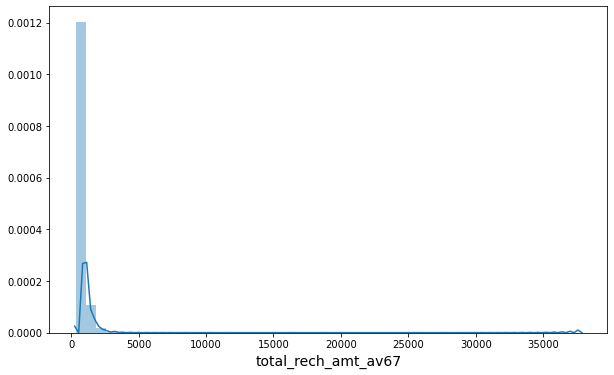

In [35]:
# Distplot for total_rech_amt_av67
plt.figure(figsize=[10,6])
univariate(churn_filtered['total_rech_amt_av67'])

count   29979.00
mean       94.20
std       177.57
min         0.00
25%         0.00
50%         0.00
75%       147.00
max      5142.50
Name: av_rech_amt_data_av67, dtype: float64


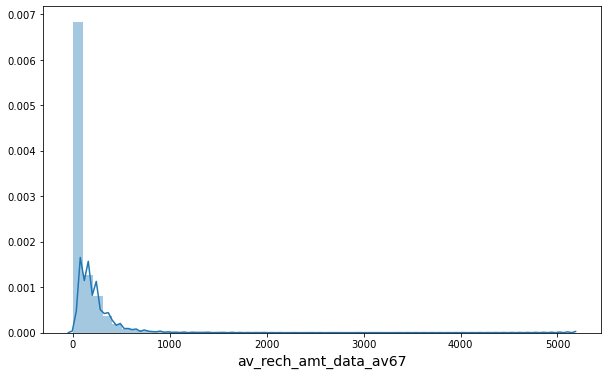

In [36]:
# Distplot for av_rech_amt_data_av67
plt.figure(figsize=[10,6])
univariate(churn_filtered['av_rech_amt_data_av67'])

count   29979.00
mean      613.91
std       602.05
min         0.00
25%       309.00
50%       520.00
75%       790.00
max     45320.00
Name: total_rech_amt_8, dtype: float64


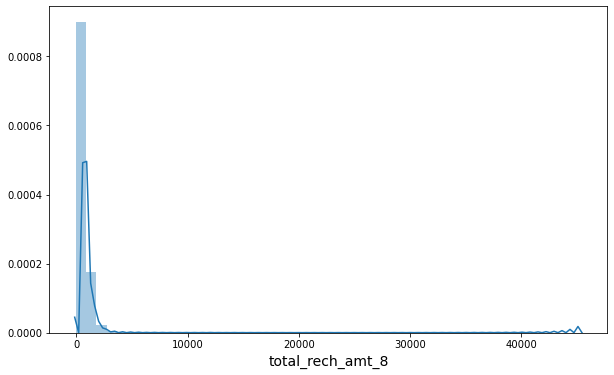

In [37]:
# Distplot for total_rech_amt_8
plt.figure(figsize=[10,6])
univariate(churn_filtered['total_rech_amt_8'])

count   29979.00
mean       89.80
std       185.89
min         0.00
25%         0.00
50%         0.00
75%       145.00
max      4061.00
Name: av_rech_amt_data_8, dtype: float64


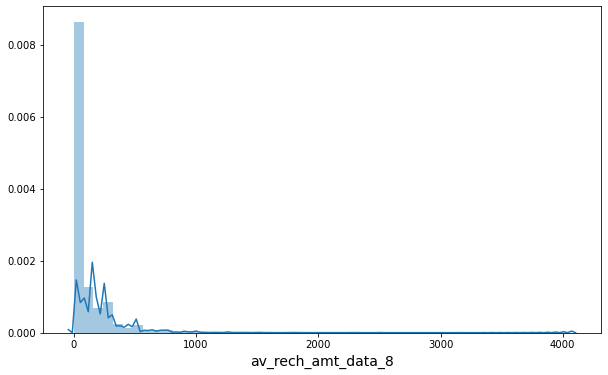

In [38]:
# Distplot for av_rech_amt_data_8
plt.figure(figsize=[10,6])
univariate(churn_filtered['av_rech_amt_data_8'])

### Univariate Analysis for Categorical columns:  We will plot the barplot for churn column, and both the good and action phase of the fb_user columns.

0    27390
1     2589
Name: churn, dtype: int64


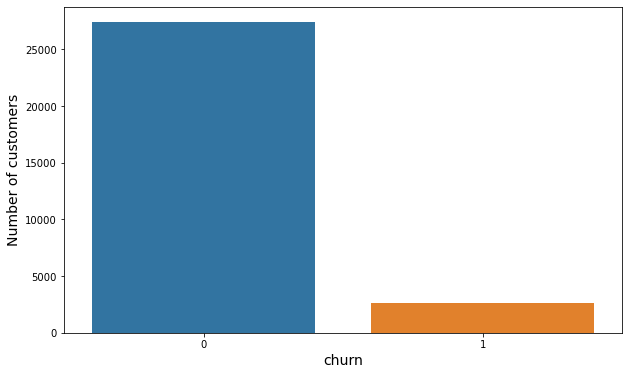

In [39]:
#Barplot of churn
plt.figure(figsize=[10,6])
univariate(churn_filtered['churn'])

0.00    17710
1.00     8320
0.50     3949
Name: fb_user_av67, dtype: int64


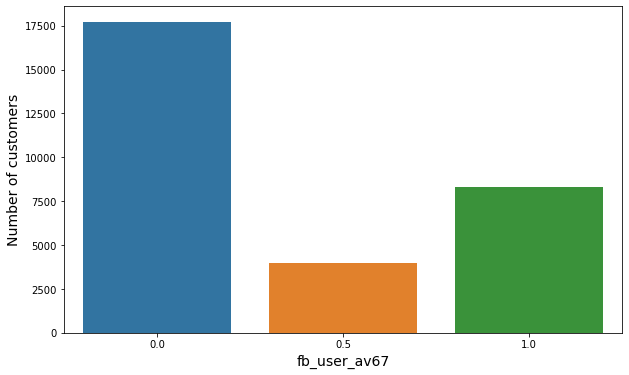

In [40]:
#Barplot of fb_user_av67
plt.figure(figsize=[10,6])
univariate(churn_filtered['fb_user_av67'])

0.00    20148
1.00     9831
Name: fb_user_8, dtype: int64


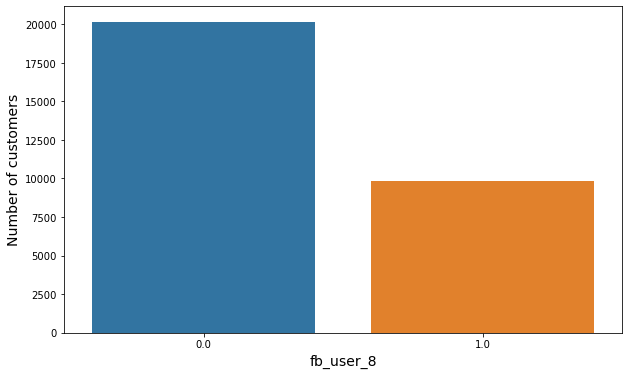

In [41]:
#Barplot of fb_user_8
plt.figure(figsize=[10,6])
univariate(churn_filtered['fb_user_8'])

### Bivariate Analysis
### Numeric-categorical: We will plot boxplots for total total_rech_amt and v_rech_amt_data of both good and action phase vs Churn column.

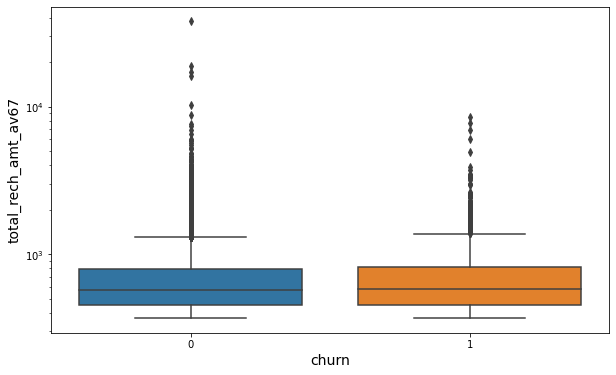

In [42]:
# Boxplot of churn vs total_rech_amt_av67
plt.figure(figsize=[10,6])
bivariate(churn_filtered['churn'], churn_filtered['total_rech_amt_av67'])
plt.yscale('log')

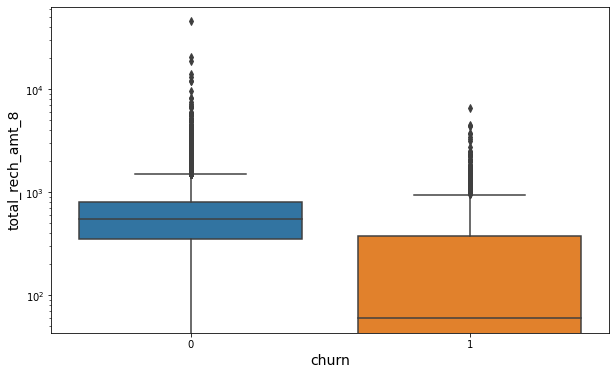

In [43]:
# Boxplot of churn vs total_rech_amt_8
plt.figure(figsize=[10,6])
bivariate(churn_filtered['churn'], churn_filtered['total_rech_amt_8'])
plt.yscale('log')

#### We can see that there is no difference between the churned and non-churned customers in total recharge amount in the good phase, but in the action phase the total recharge amount is much lower in churned customers than in non-churned customers.

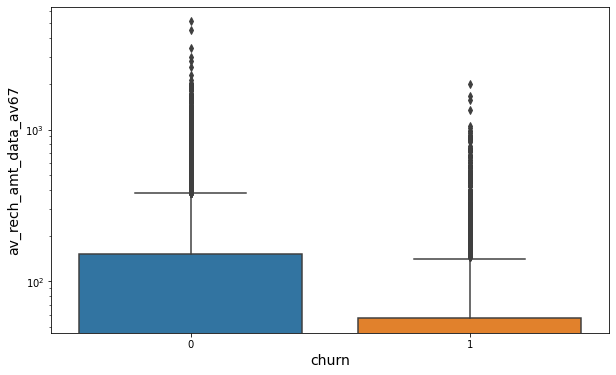

In [44]:
plt.figure(figsize=[10,6])
bivariate(churn_filtered['churn'], churn_filtered['av_rech_amt_data_av67'])
plt.yscale('log')

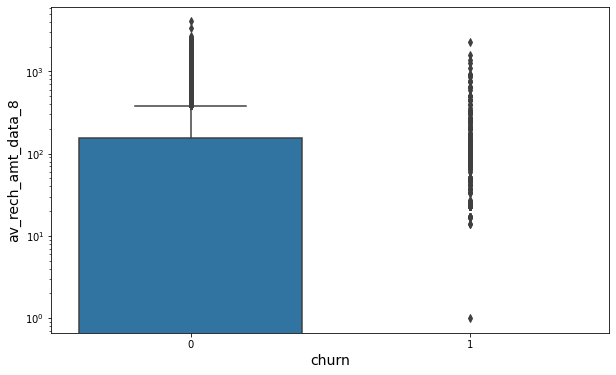

In [45]:
plt.figure(figsize=[10,6])
bivariate(churn_filtered['churn'], churn_filtered['av_rech_amt_data_8'])
plt.yscale('log')

#### We can see that the av_rech_amt_data is lower in churned customers than in non-churned customers, this trend is seen in both the phases but it is more pronounced in the action phase.

### Bivariate numeric-numeric analysis: We will plot the heatmap for the numeric variables.
#### Since there are too many numeric columns, we will convert churn to numeric and plot the heatmap with 15 columns with highest correlation with 'churn'.

In [46]:
#Converting churn column to numeric
churn_filtered['churn'] = churn_filtered['churn'].astype(int)

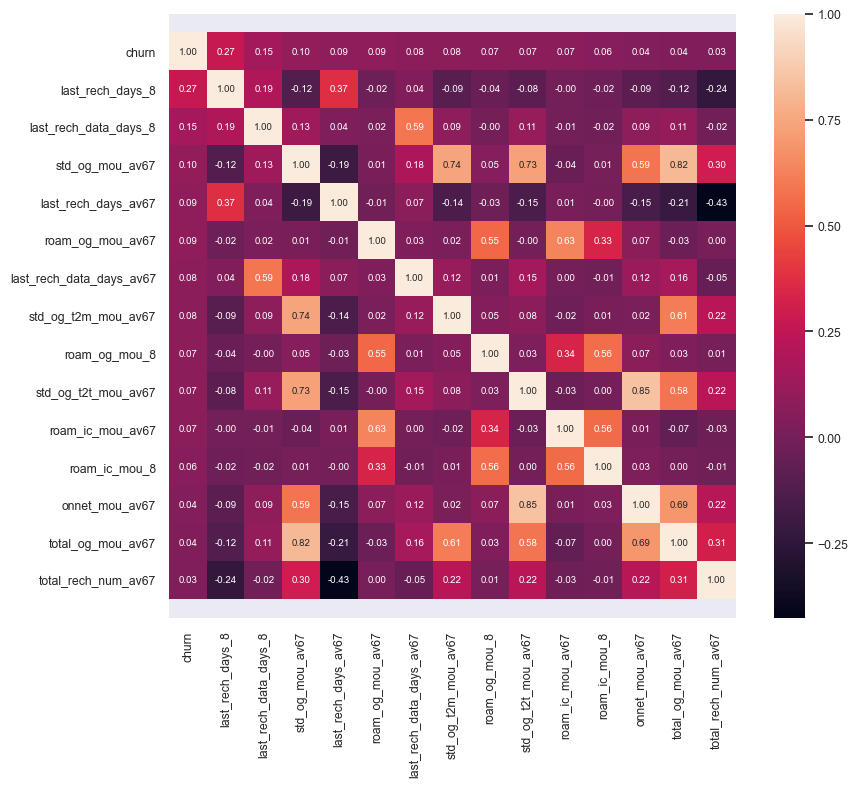

In [47]:
#plotting the heatmap for 15 numeric columns with highest correlation with churn.

plt.figure(figsize=(10,8),dpi = 100)
k = 15 #number of variables for heatmap
corrmat = churn_filtered.corr()
cols = corrmat.nlargest(k, 'churn')['churn'].index
cm = np.corrcoef(churn_filtered[cols].values.T)
sns.set(font_scale=0.8)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 7}, yticklabels=cols.values, xticklabels=cols.values)
bottom,top = hm.get_ylim()
hm.set_ylim(bottom+0.5,top-0.5)
plt.show()

## Outlier Handling
### We will cap the outliers in all numeric variables with k-sigma technique

In [48]:
#function for capping the outliers with k-sigma technique.
def cap_outliers(array, k=3):
    upper_limit = array.mean() + k*array.std()
    lower_limit = array.mean() - k*array.std()
    array[array<lower_limit] = lower_limit
    array[array>upper_limit] = upper_limit
    return array

In [49]:
# cap outliers in the numeric columns
churn_filtered[num_cols] = churn_filtered[num_cols].apply(cap_outliers, axis=0)

## Checking the skewness of the data.

In [50]:
churn_filtered.describe()

,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,std_og_t2f_mou_8,std_og_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,total_og_mou_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,loc_ic_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_t2f_mou_8,std_ic_mou_8,total_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,last_day_rch_amt_8,total_rech_data_8,max_rech_data_8,count_rech_2g_8,count_rech_3g_8,av_rech_amt_data_8,vol_2g_mb_8,vol_3g_mb_8,arpu_3g_8,arpu_2g_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,aon,vbc_3g_8,last_rech_days_8,last_rech_data_days_8,churn,arpu_av67,onnet_mou_av67,offnet_mou_av67,roam_ic_mou_av67,roam_og_mou_av67,loc_og_t2t_mou_av67,loc_og_t2m_mou_av67,loc_og_t2f_mou_av67,loc_og_t2c_mou_av67,loc_og_mou_av67,std_og_t2t_mou_av67,std_og_t2m_mou_av67,std_og_t2f_mou_av67,std_og_mou_av67,isd_og_mou_av67,spl_og_mou_av67,og_others_av67,total_og_mou_av67,loc_ic_t2t_mou_av67,loc_ic_t2m_mou_av67,loc_ic_t2f_mou_av67,loc_ic_mou_av67,std_ic_t2t_mou_av67,std_ic_t2m_mou_av67,std_ic_t2f_mou_av67,std_ic_mou_av67,total_ic_mou_av67,spl_ic_mou_av67,isd_ic_mou_av67,ic_others_av67,total_rech_num_av67,total_rech_amt_av67,max_rech_amt_av67,last_day_rch_amt_av67,total_rech_data_av67,max_rech_data_av67,count_rech_2g_av67,count_rech_3g_av67,av_rech_amt_data_av67,vol_2g_mb_av67,vol_3g_mb_av67,arpu_3g_av67,arpu_2g_av67,monthly_2g_av67,sachet_2g_av67,monthly_3g_av67,sachet_3g_av67,vbc_3g_av67,last_rech_days_av67,last_rech_data_days_av67,arpu_diff,onnet_mou_diff,offnet_mou_diff,roam_ic_mou_diff,roam_og_mou_diff,loc_og_mou_diff,std_og_mou_diff,isd_og_mou_diff,spl_og_mou_diff,total_og_mou_diff,loc_ic_mou_diff,std_ic_mou_diff,isd_ic_mou_diff,spl_ic_mou_diff,total_ic_mou_diff,total_rech_num_diff,total_rech_amt_diff,max_rech_amt_diff,total_rech_data_diff,max_rech_data_diff,av_rech_amt_data_diff,vol_2g_mb_diff,vol_3g_mb_diff
count,29979.00,29979.00,29979.00,29979.00,29979.00,29979.00,29979.00,29979.00,29979.00,29979.00,29979.00,29979.00,29979.00,29979.00,29979.00,29979.00,29979.00,29979.00,29979.00,29979.00,29979.00,29979.00,29979.00,29979.00,29979.00,29979.00,29979.00,29979.00,29979.00,29979.00,29979.00,29979.00,29979.00,29979.00,29979.00,29979.00,29979.00,29979.00,29979.00,29979.00,29979.00,29979.00,29979.00,29979.00,29979.00,29979.00,29979.00,29979.00,29979.00,29979.00,29979.00,29979.00,29979.00,29979.00,29979.00,29979.00,29979.00,29979.00,29979.00,29979.00,29979.00,29979.00,29979.00,29979.00,29979.00,29979.00,29979.00,29979.00,29979.00,29979.00,29979.00,29979.00,29979.00,29979.00,29979.00,29979.00,29979.00,29979.00,29979.00,29979.00,29979.00,29979.00,29979.00,29979.00,29979.00,29979.00,29979.00,29979.00,29979.00,29979.00,29979.00,29979.00,29979.00,29979.00,29979.00,29979.00,29979.00,29979.00,29979.00,29979.00,29979.00,29979.00,29979.00,29979.00,29979.00,29979.00,29979.00,29979.00,29979.00,29979.00,29979.00,29979.00,29979.00,29979.00,29979.00,29979.00,29979.00,29979.00,29979.00,29979.00,29979.00,29979.00,29979.00,29979.00,29979.00
mean,524.79,250.79,359.78,9.99,16.49,76.78,160.09,5.64,1.42,249.73,156.08,163.09,1.26,334.75,1.16,6.04,0.02,605.62,58.93,146.25,12.78,223.99,12.31,26.06,2.05,41.93,283.67,0.02,8.35,0.87,9.99,601.73,156.60,90.68,0.94,52.40,0.64,0.26,83.15,56.54,234.34,44.86,41.49,0.10,0.53,0.15,0.09,1264.15,112.69,4.42,22.57,0.09,578.88,286.39,407.67,12.37,20.88,84.23,174.03,6.19,1.48,271.85,182.09,193.97,1.48,390.71,1.42,6.01,0.33,682.76,62.85,152.96,14.08,235.91,13.85,28.39,2.28,46.34,300.15,0.04,8.69,1.00,11.80,685.56,168.10,100.73,0.91,55.44,0.60,0.28,88.59,66.53,237.41,48.44,45.38,0.12,0.47,0.16,0.10,112.50,3.35,22.22,-54.95,-32.47,-45.60,-2.35,-4.50,-21.74,-51.43,-0.19,0.00,-74.56,-10.95,-4.16,-0.34,-0.01,-15.31,-1.76,-84.40,-9.08,0.03,-2.41,-4.43,-9.73,-2.01
std,371.87,367.20,383.42,36.41,56.06,133.71,193.24,12.57,4.10,294.70,315.85,304.95,5.14,512.9

In [51]:
#Extracting all the numeric columns
numeric_f = churn_filtered.dtypes[churn_filtered.dtypes != "object"].index

# Check the skew of all numerical features
skewed_f = churn_filtered[numeric_f].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
skewness = pd.DataFrame({'Skew in train data' :skewed_f})
skewness.head(10)

,Skew in train data
og_others_8,25.21
isd_og_mou_8,11.37
isd_og_mou_av67,10.37
night_pck_user_8,10.22
night_pck_user_av67,9.36
ic_others_8,7.33
ic_others_av67,7.19
std_ic_t2f_mou_8,5.78
isd_ic_mou_8,5.44
std_og_t2f_mou_8,5.43


#### We can see that there is high skewness in the data, this will be handled after train-test split.

## Train Test Split 

In [52]:
df_train, df_test = train_test_split(churn_filtered, test_size=0.3, random_state=11)

## Power Transformation

In [53]:
power = PowerTransformer()

# fit_transform train dataset
df_train[num_cols] = power.fit_transform(df_train[num_cols])

# transform test dataset
df_test[num_cols] = power.transform(df_test[num_cols])

## Scaling 

In [54]:
scaler = StandardScaler()
# fit_transform train dataset
df_train[num_cols] = scaler.fit_transform(df_train[num_cols])

# transform test dataset
df_test[num_cols] = scaler.transform(df_test[num_cols])

In [55]:
y_train = df_train.pop('churn')
X_train = df_train

In [56]:
y_test = df_test.pop('churn')
X_test = df_test

In [57]:
X_train = X_train.astype(int)
X_test = X_test.astype(int)

In [58]:
print("X_train Shape : ", X_train.shape)
print("X_test Shape : ", X_test.shape)

y_train_imb = (y_train != 0).sum()/(y_train == 0).sum()
y_test_imb = (y_test != 0).sum()/(y_test == 0).sum()
print("Imbalance in Train Data : ", y_train_imb)
print("Imbalance in Test Data : ", y_test_imb)

X_train Shape :  (20985, 128)
X_test Shape :  (8994, 128)
Imbalance in Train Data :  0.09365228267667292
Imbalance in Test Data :  0.09656181419166057


## Handling Data Imbalance
### We will handle the high data imbalance in the data using class weights technique, so we will find the class weights for balanced data.

In [59]:
#Calculating class weight for a balanced dataset.
class_weights = class_weight.compute_class_weight('balanced',
                                                 np.unique(y_train),
                                                 y_train)

class_weights

array([0.54682614, 5.83889816])

## PCA 

In [60]:
#Importing the PCA module
from sklearn.decomposition import PCA
pca = PCA(random_state=42)

#Doing the PCA on the train data
pca.fit(X_train)

PCA(random_state=42)

In [61]:
col = list(X_train.columns)
df_pca = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'PC3':pca.components_[2],'Feature':col})
df_pca.head(10)

,PC1,PC2,PC3,Feature
0,0.18,0.02,0.09,arpu_8
1,0.12,0.13,0.05,onnet_mou_8
2,0.20,0.11,0.03,offnet_mou_8
3,-0.03,0.03,0.01,roam_ic_mou_8
4,-0.03,0.03,0.01,roam_og_mou_8
5,0.17,-0.00,-0.08,loc_og_t2t_mou_8
6,0.18,-0.01,-0.09,loc_og_t2m_mou_8
7,0.06,-0.04,-0.05,loc_og_t2f_mou_8
8,0.04,0.02,0.04,loc_og_t2c_mou_8
9,0.18,-0.01,-0.09,loc_og_mou_8


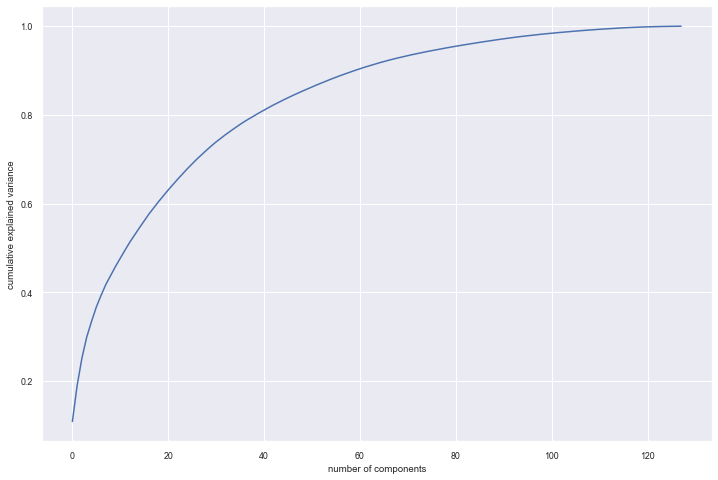

In [62]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

### From the plot above we have decided to create new train and test datasets using PCA with 60 components. 

In [63]:
#PCA with 60 components.
pca_60 = PCA(n_components=60)

df_tr_pca = pca_60.fit_transform(X_train)
print("df_tr_pca Shape : ", df_tr_pca.shape)

df_test_pca = pca_60.transform(X_test)
print("df_test_pca Shape : ", df_test_pca.shape)

print("Total Explained Variance with pca_60:", sum(pca_60.explained_variance_ratio_))

df_tr_pca Shape :  (20985, 60)
df_test_pca Shape :  (8994, 60)
Total Explained Variance with pca_60: 0.9001006410682125


# Model Building with PCA

### First we will define a function for evaluating the models.

In [67]:
# Evalution function.
def evaluate_model(dt_classifier):
    #Predict on train and test data.
    y_train_pred = dt_classifier.predict(df_tr_pca)
    y_test_pred = dt_classifier.predict(df_test_pca)
    
    #Train performance
    print("Train set performance")
    print(accuracy_score(y_train, y_train_pred))
    confusion = confusion_matrix(y_train, y_train_pred)
    print(confusion)
    TP = confusion[1,1] # true positive 
    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives
    FN = confusion[1,0] # false negative

    #Sensitivity, Specificity, Precision and Recall
    sensitivity = TP/float(TP+FN)
    specificity = TN/float(TN+FP)
    precision = TP/float(TP+FP)
    recall = TP/float(TP+FN)
    print("Sensitivity: {0}".format(sensitivity))
    print("Specificity: {0}".format(specificity))
    print("Precision: {0}".format(precision))
    print("Recall: {0}".format(recall))
    print("-"*50)
    
    #Test Performance
    print("Test set performance")
    print(accuracy_score(y_test, y_test_pred))
    confusion2 = confusion_matrix(y_test, y_test_pred)
    print(confusion2)
    TP = confusion2[1,1] # true positive 
    TN = confusion2[0,0] # true negatives
    FP = confusion2[0,1] # false positives
    FN = confusion2[1,0] # false negative

    #Sensitivity, Specificity, Precision and Recall
    sensitivity = TP/float(TP+FN)
    specificity = TN/float(TN+FP)
    precision = TP/float(TP+FP)
    recall = TP/float(TP+FN)
    print("Sensitivity: {0}".format(sensitivity))
    print("Specificity: {0}".format(specificity))
    print("Precision: {0}".format(precision))
    print("Recall: {0}".format(recall))

## XGBOOST 

In [90]:
xgb_model = xgb.XGBClassifier()

#Parameters to be tuned
parameters = {'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5],
              'max_depth': [4, 6, 8, 10, 12],
              'min_child_weight': [3, 7, 11, 19, 25],
              'n_estimators': [50, 100, 150, 200, 300, 500],
             'scale_pos_weight':[10,20,30,40]}

cv = StratifiedKFold(2)

#HyperTuning with above mentioned parameters and cv using recall as scoring metric.
clf_xgb = GridSearchCV(estimator=xgb_model,param_grid=parameters,
                                       n_jobs=-1,cv=cv,
                                       scoring='recall',refit=True)

clf_xgb.fit(df_tr_pca, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=2, random_state=None, shuffle=False),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     mis...
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, validate_parameters=None,
              

In [91]:
#Results from the GridSearchCV
print(clf_xgb.best_params_)
print(clf_xgb.best_score_)
print(clf_xgb.best_estimator_)

{'learning_rate': 0.1, 'max_depth': 4, 'min_child_weight': 25, 'n_estimators': 50, 'scale_pos_weight': 40}
0.8931527482899831
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=25, missing=nan, monotone_constraints='()',
              n_estimators=50, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=40, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)


In [92]:
#Evaluating the best estimator.
evaluate_model(clf_xgb.best_estimator_)

Train set performance
0.7569216106742912
[[14122  5066]
 [   35  1762]]
Sensitivity: 0.9805230940456316
Specificity: 0.735980821346675
Precision: 0.2580550673696544
Recall: 0.9805230940456316
--------------------------------------------------
Test set performance
0.7440515899488548
[[5972 2230]
 [  72  720]]
Sensitivity: 0.9090909090909091
Specificity: 0.7281150938795415
Precision: 0.2440677966101695
Recall: 0.9090909090909091


#### Further optimising the model 

In [93]:
#Parameters to be tuned.
parameters = {'learning_rate': [0.001,0.01,0.1],
              'max_depth': [3, 4, 5],
              'min_child_weight': [20, 25, 30, 40],
              'n_estimators': [30, 40, 50],
             'scale_pos_weight':[40, 50, 60, 70]}

cv = StratifiedKFold(2)

#Tuning wuth above mentioned parameters and cv using recall as scoring metric.
clf_xgb1 = GridSearchCV(estimator=xgb_model,param_grid=parameters,
                                       n_jobs=-1,cv=cv,
                                       scoring='recall',refit=True)

clf_xgb1.fit(df_tr_pca, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=2, random_state=None, shuffle=False),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     mis...
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, validate_parameters=None,
              

In [94]:
#GridSearchCV results
print(clf_xgb1.best_params_)
print(clf_xgb1.best_score_)
print(clf_xgb1.best_estimator_)

{'learning_rate': 0.01, 'max_depth': 3, 'min_child_weight': 25, 'n_estimators': 50, 'scale_pos_weight': 70}
0.968842514944841
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=3,
              min_child_weight=25, missing=nan, monotone_constraints='()',
              n_estimators=50, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=70, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)


In [95]:
#Evaluating the best estimator.
evaluate_model(clf_xgb1.best_estimator_)

Train set performance
0.49249463902787705
[[ 8597 10591]
 [   59  1738]]
Sensitivity: 0.9671675013912076
Specificity: 0.44804044194288095
Precision: 0.14096844837375294
Recall: 0.9671675013912076
--------------------------------------------------
Test set performance
0.4983322214809873
[[3729 4473]
 [  39  753]]
Sensitivity: 0.9507575757575758
Specificity: 0.4546452084857352
Precision: 0.14408725602755454
Recall: 0.9507575757575758


### XGBoost is giving the best recall score on both train and test data. If we have to just focus on recall, then this would be Best model to choose, but since recall alone wont be a good metric, we also look at overall accuracy. In this case, we have very high number of False Positives, which is not good.
### We would look at other models also and check if they can provide us with better results.

## RANDOM FOREST 

In [98]:
#Intializing Random Forest Classifier
classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1, oob_score=True, class_weight ='balanced')

#Parameters to be tuned.
params = {
    'n_estimators': [25, 50, 100, 200],
    'max_depth' : [3, 5, 8],
    'max_features' : [10, 20, 40, 50]
}

cv = StratifiedKFold(4)

#Tuning wuth above mentioned parameters and cv using recall as scoring metric.
gcv = GridSearchCV(estimator=classifier_rf, param_grid=params, cv=cv, n_jobs=-1,
                  verbose=-1, scoring = 'recall')

gcv.fit(df_tr_pca,y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 192 out of 192 | elapsed: 14.0min finished


GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(class_weight='balanced',
                                              n_jobs=-1, oob_score=True,
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [3, 5, 8],
                         'max_features': [10, 20, 40, 50],
                         'n_estimators': [25, 50, 100, 200]},
             scoring='recall', verbose=-1)

In [99]:
#GridSearchCV results
print(gcv.best_params_)
print(gcv.best_score_)
print(gcv.best_estimator_)
print(gcv.best_estimator_.oob_score_)

{'max_depth': 3, 'max_features': 40, 'n_estimators': 50}
0.7417842118287553
RandomForestClassifier(class_weight='balanced', max_depth=3, max_features=40,
                       n_estimators=50, n_jobs=-1, oob_score=True,
                       random_state=42)
0.8610436025732666


In [100]:
#Evaluating the best estimator.
evaluate_model(gcv.best_estimator_)

Train set performance
0.8625685013104598
[[16756  2432]
 [  452  1345]]
Sensitivity: 0.7484696716750139
Specificity: 0.8732541171565562
Precision: 0.356102727032036
Recall: 0.7484696716750139
--------------------------------------------------
Test set performance
0.858683566822326
[[7135 1067]
 [ 204  588]]
Sensitivity: 0.7424242424242424
Specificity: 0.8699097781029017
Precision: 0.3552870090634441
Recall: 0.7424242424242424


#### Further optimising the model 

In [101]:
#Intializing Random Forest Classifier
classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1, oob_score=True, class_weight= {0: 0.5, 1: 7.5})

#Parameters to be tuned.
params = {
    'n_estimators': [45, 50, 55, 60, 70],
    'max_depth' : [3,4,5],
    'max_features' : [35, 40, 45, 50]
}

cv = StratifiedKFold(5)

#Tuning wuth above mentioned parameters and cv using recall as scoring metric.
gcv1 = GridSearchCV(estimator=classifier_rf, param_grid=params, cv=cv, n_jobs=-1, verbose=-1, scoring = 'recall')

gcv1.fit(df_tr_pca,y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed: 13.9min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 15.4min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(class_weight={0: 0.5, 1: 7.5},
                                              n_jobs=-1, oob_score=True,
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5],
                         'max_features': [35, 40, 45, 50],
                         'n_estimators': [45, 50, 55, 60, 70]},
             scoring='recall', verbose=-1)

In [102]:
#GridSearchCV results
print(gcv1.best_params_)
print(gcv1.best_score_)
print(gcv1.best_estimator_)
print(gcv1.best_estimator_.oob_score_)

{'max_depth': 4, 'max_features': 50, 'n_estimators': 50}
0.8041163726400496
RandomForestClassifier(class_weight={0: 0.5, 1: 7.5}, max_depth=4,
                       max_features=50, n_estimators=50, n_jobs=-1,
                       oob_score=True, random_state=42)
0.8316416487967596


In [103]:
#Evaluating the best estimator.
evaluate_model(gcv1.best_estimator_)

Train set performance
0.837836549916607
[[16085  3103]
 [  300  1497]]
Sensitivity: 0.8330550918196995
Specificity: 0.8382843443819054
Precision: 0.3254347826086956
Recall: 0.8330550918196995
--------------------------------------------------
Test set performance
0.8385590393595731
[[6896 1306]
 [ 146  646]]
Sensitivity: 0.8156565656565656
Specificity: 0.8407705437698122
Precision: 0.33094262295081966
Recall: 0.8156565656565656


In [104]:
rf = RandomForestClassifier(max_depth = 4, max_features=50, n_estimators=45, random_state=42, n_jobs=-1, oob_score=True, class_weight= {0: 0.5, 1: 8})
rf.fit(df_tr_pca,y_train)

RandomForestClassifier(class_weight={0: 0.5, 1: 8}, max_depth=4,
                       max_features=50, n_estimators=45, n_jobs=-1,
                       oob_score=True, random_state=42)

In [105]:
evaluate_model(rf)

Train set performance
0.8278294019537765
[[15857  3331]
 [  282  1515]]
Sensitivity: 0.8430717863105175
Specificity: 0.8264019178653325
Precision: 0.31262897234832854
Recall: 0.8430717863105175
--------------------------------------------------
Test set performance
0.8279964420724928
[[6794 1408]
 [ 139  653]]
Sensitivity: 0.8244949494949495
Specificity: 0.828334552548159
Precision: 0.316836487142164
Recall: 0.8244949494949495


### Random Forest is performing good as compared to XGBoost, when we look at all the metrics. Accuracy, Specificity and Recall all have values around 82% for both training and test data. In case of XGBoost, accuracy was around 50% and Specificity was 45%, even though recall was 95%.
### Random Forest is more balanced and would perform better in real-time.

## LOGISTIC REGRESSION

In [145]:
#Initializing Logistic Regression
lr = LogisticRegression(class_weight= {0: 0.5, 1: 7.5})

#Parameters to be tuned
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}

cv = StratifiedKFold(5)

#GridSearchCV with the above parameters and cv.
logreg_cv=GridSearchCV(lr, grid, cv=cv)

logreg_cv.fit(df_tr_pca, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(class_weight={0: 0.5, 1: 7.5}),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2']})

In [146]:
#GridSearchCV results
print(logreg_cv.best_params_)
print(logreg_cv.best_score_)
print(logreg_cv.best_estimator_)

{'C': 0.01, 'penalty': 'l2'}
0.8426018584703361
LogisticRegression(C=0.01, class_weight={0: 0.5, 1: 7.5})


In [147]:
#Evaluating the best estimator.
evaluate_model(logreg_cv)

Train set performance
0.8434596140100071
[[16121  3067]
 [  218  1579]]
Sensitivity: 0.8786867000556483
Specificity: 0.8401605169897853
Precision: 0.33986224709427465
Recall: 0.8786867000556483
--------------------------------------------------
Test set performance
0.8398932621747832
[[6863 1339]
 [ 101  691]]
Sensitivity: 0.8724747474747475
Specificity: 0.8367471348451597
Precision: 0.34039408866995075
Recall: 0.8724747474747475


#### Tweaking class weights 

In [160]:
lr = LogisticRegression(C=0.01,penalty='l2',class_weight= {0: 0.5, 1: 8})
lr.fit(df_tr_pca, y_train)

LogisticRegression(C=0.01, class_weight={0: 0.5, 1: 8})

In [161]:
evaluate_model(lr)

Train set performance
0.8363593042649512
[[15960  3228]
 [  206  1591]]
Sensitivity: 0.8853644963828603
Specificity: 0.8317698561601
Precision: 0.33015148371031333
Recall: 0.8853644963828603
--------------------------------------------------
Test set performance
0.8335557038025351
[[6802 1400]
 [  97  695]]
Sensitivity: 0.8775252525252525
Specificity: 0.8293099244086808
Precision: 0.3317422434367542
Recall: 0.8775252525252525


### Logistic regression is performing best out of all the other models. With PCA, we have reduced the dimensionality to 60 components and then performed hyperparameter tuning to obtain best model having good accuracy, roc-auc score and high recall.

In [152]:
from sklearn.metrics import f1_score

In [153]:
y_test_pred = lr.predict(df_test_pca)
y_tr_pred = lr.predict(df_tr_pca)

In [156]:
print("AUC on Train data:",roc_auc_score(y_train, y_tr_pred))
print("AUC on Test data:",roc_auc_score(y_test, y_test_pred))

AUC on Train data: 0.8585671762714802
AUC on Test data: 0.8534175884669667


In [157]:
print('F1 Score Train data:',f1_score(y_train, y_tr_pred))
print('F1 Score Test data:',f1_score(y_test, y_test_pred))

F1 Score Train data: 0.4809552599758162
F1 Score Test data: 0.4814686525805334


## BEST RESULTS ARE THROUGH LOGISTIC REGRESSION 

#### Metrics for the train and test data
- #### Train AUC: 0.859 &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; Test AUC: 0.853
- #### Train Accuracy: 0.84 &emsp;&emsp;&emsp;&emsp;&ensp; Test Accuracy: 0.83
- #### Train Sensitivity: 0.885 &emsp;&emsp;&emsp;&emsp; Test Sensitivity: 0.88
- #### Train Specificity: 0.83 &emsp;&emsp;&emsp;&emsp; Test Specificity: 0.83
- #### Train Precision: 0.33 &emsp;&emsp;&emsp;&emsp;&ensp; Test Precision: 0.33
- #### Train Recall: 0.885 &emsp;&emsp;&emsp;&emsp;&emsp;&emsp; Test Recall: 0.88

## Model Building without PCA
### We will build a model to identify important predictors

#### Train-Test Split

In [160]:
#First we will split the dependent variable and independent variables.
y = churn_filtered['churn']
X = churn_filtered.drop('churn', axis=1)

In [161]:
# Splitting the data into train and test with 70:30 ratio and random_state=42
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [162]:
#Dataset to be used
print("X_train Shape : ", X_train.shape)
print("X_test Shape : ", X_test.shape)

y_train_imb = (y_train != 0).sum()/(y_train == 0).sum()
y_test_imb = (y_test != 0).sum()/(y_test == 0).sum()
print("Imbalance in Train Data : ", y_train_imb)
print("Imbalance in Test Data : ", y_test_imb)

X_train Shape :  (20985, 128)
X_test Shape :  (8994, 128)
Imbalance in Train Data :  0.09393734035343794
Imbalance in Test Data :  0.09589374923845498


### Power Transformation

In [163]:
#We will tranform all the numeric columns to reduce skewness.
power = PowerTransformer()

# fit_transform train dataset
X_train[num_cols] = power.fit_transform(X_train[num_cols])

# transform test dataset
X_test[num_cols] = power.transform(X_test[num_cols])

### Scaling 

In [164]:
#We will scale the numeric varibles using standard scaler.
scaler = StandardScaler()

# fit_transform train dataset
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

# transform test dataset
X_test[num_cols] = scaler.transform(X_test[num_cols])

X_train.describe()

,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,std_og_t2f_mou_8,std_og_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,total_og_mou_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,loc_ic_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_t2f_mou_8,std_ic_mou_8,total_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,last_day_rch_amt_8,total_rech_data_8,max_rech_data_8,count_rech_2g_8,count_rech_3g_8,av_rech_amt_data_8,vol_2g_mb_8,vol_3g_mb_8,arpu_3g_8,arpu_2g_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,aon,vbc_3g_8,last_rech_days_8,last_rech_data_days_8,arpu_av67,onnet_mou_av67,offnet_mou_av67,roam_ic_mou_av67,roam_og_mou_av67,loc_og_t2t_mou_av67,loc_og_t2m_mou_av67,loc_og_t2f_mou_av67,loc_og_t2c_mou_av67,loc_og_mou_av67,std_og_t2t_mou_av67,std_og_t2m_mou_av67,std_og_t2f_mou_av67,std_og_mou_av67,isd_og_mou_av67,spl_og_mou_av67,og_others_av67,total_og_mou_av67,loc_ic_t2t_mou_av67,loc_ic_t2m_mou_av67,loc_ic_t2f_mou_av67,loc_ic_mou_av67,std_ic_t2t_mou_av67,std_ic_t2m_mou_av67,std_ic_t2f_mou_av67,std_ic_mou_av67,total_ic_mou_av67,spl_ic_mou_av67,isd_ic_mou_av67,ic_others_av67,total_rech_num_av67,total_rech_amt_av67,max_rech_amt_av67,last_day_rch_amt_av67,total_rech_data_av67,max_rech_data_av67,count_rech_2g_av67,count_rech_3g_av67,av_rech_amt_data_av67,vol_2g_mb_av67,vol_3g_mb_av67,arpu_3g_av67,arpu_2g_av67,monthly_2g_av67,sachet_2g_av67,monthly_3g_av67,sachet_3g_av67,vbc_3g_av67,last_rech_days_av67,last_rech_data_days_av67,arpu_diff,onnet_mou_diff,offnet_mou_diff,roam_ic_mou_diff,roam_og_mou_diff,loc_og_mou_diff,std_og_mou_diff,isd_og_mou_diff,spl_og_mou_diff,total_og_mou_diff,loc_ic_mou_diff,std_ic_mou_diff,isd_ic_mou_diff,spl_ic_mou_diff,total_ic_mou_diff,total_rech_num_diff,total_rech_amt_diff,max_rech_amt_diff,total_rech_data_diff,max_rech_data_diff,av_rech_amt_data_diff,vol_2g_mb_diff,vol_3g_mb_diff
count,20985.00,20985.00,20985.00,20985.00,20985.00,20985.00,20985.00,20985.00,20985.00,20985.00,20985.00,20985.00,20985.00,20985.00,20985.00,20985.00,20985.00,20985.00,20985.00,20985.00,20985.00,20985.00,20985.00,20985.00,20985.00,20985.00,20985.00,20985.00,20985.00,20985.00,20985.00,20985.00,20985.00,20985.00,20985.00,20985.00,20985.00,20985.00,20985.00,20985.00,20985.00,20985.00,20985.00,20985.00,20985.00,20985.00,20985.00,20985.00,20985.00,20985.00,20985.00,20985.00,20985.00,20985.00,20985.00,20985.00,20985.00,20985.00,20985.00,20985.00,20985.00,20985.00,20985.00,20985.00,20985.00,20985.00,20985.00,20985.00,20985.00,20985.00,20985.00,20985.00,20985.00,20985.00,20985.00,20985.00,20985.00,20985.00,20985.00,20985.00,20985.00,20985.00,20985.00,20985.00,20985.00,20985.00,20985.00,20985.00,20985.00,20985.00,20985.00,20985.00,20985.00,20985.00,20985.00,20985.00,20985.00,20985.00,20985.00,20985.00,20985.00,20985.00,20985.00,20985.00,20985.00,20985.00,20985.00,20985.00,20985.00,20985.00,20985.00,20985.00,20985.00,20985.00,20985.00,20985.00,20985.00,20985.00,20985.00,20985.00,20985.00,20985.00,20985.00,20985.00
mean,0.00,-0.00,-0.00,-0.00,0.00,-0.00,0.00,0.00,-0.00,-0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,-0.00,0.00,-0.00,0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,-0.00,0.00,0.00,-0.00,0.00,-0.00,-0.00,0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,-0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.

## Logistic Regression Model.
### First we will course tune the variables using RFE to 15 columns.

In [165]:
from sklearn.feature_selection import RFE

lm = LogisticRegression()    #Creating Logistic Regression Model
lm.fit(X_train,y_train)      #Fitting x_train and y_train

rfe = RFE(lm,15)     #Creating RFE for dropping to 15 dependent variables
rfe = rfe.fit(X_train,y_train)    #Fitting X_train and y_train to the RFE.
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('arpu_8', False, 31),
 ('onnet_mou_8', False, 3),
 ('offnet_mou_8', False, 13),
 ('roam_ic_mou_8', False, 35),
 ('roam_og_mou_8', True, 1),
 ('loc_og_t2t_mou_8', False, 8),
 ('loc_og_t2m_mou_8', False, 9),
 ('loc_og_t2f_mou_8', False, 82),
 ('loc_og_t2c_mou_8', False, 105),
 ('loc_og_mou_8', False, 7),
 ('std_og_t2t_mou_8', False, 5),
 ('std_og_t2m_mou_8', False, 30),
 ('std_og_t2f_mou_8', False, 64),
 ('std_og_mou_8', False, 24),
 ('isd_og_mou_8', False, 50),
 ('spl_og_mou_8', False, 112),
 ('og_others_8', False, 104),
 ('total_og_mou_8', False, 23),
 ('loc_ic_t2t_mou_8', False, 96),
 ('loc_ic_t2m_mou_8', True, 1),
 ('loc_ic_t2f_mou_8', False, 113),
 ('loc_ic_mou_8', False, 97),
 ('std_ic_t2t_mou_8', False, 109),
 ('std_ic_t2m_mou_8', False, 75),
 ('std_ic_t2f_mou_8', False, 47),
 ('std_ic_mou_8', False, 6),
 ('total_ic_mou_8', True, 1),
 ('spl_ic_mou_8', True, 1),
 ('isd_ic_mou_8', False, 39),
 ('ic_others_8', False, 40),
 ('total_rech_num_8', False, 2),
 ('total_rech_amt_8', False

In [166]:
#Storing the columns chosen by RFE into col variale.
col = X_train.columns[rfe.support_]
col

Index(['roam_og_mou_8', 'loc_ic_t2m_mou_8', 'total_ic_mou_8', 'spl_ic_mou_8',
       'last_day_rch_amt_8', 'count_rech_3g_8', 'vol_2g_mb_8',
       'night_pck_user_8', 'monthly_3g_8', 'sachet_3g_8', 'last_rech_days_8',
       'last_rech_data_days_8', 'total_ic_mou_av67', 'max_rech_data_av67',
       'av_rech_amt_data_av67'],
      dtype='object')

In [167]:
for i in col:
    if X_train[i].dtype != 'float64' and X_train[i].dtype != 'int64':
        print(X_train[i].value_counts())
        X_train[i] = X_train[i].astype('float64')
        X_test[i] = X_test[i].astype('float64')

0.00    20804
1.00      181
Name: night_pck_user_8, dtype: int64


#### Logistic Regression cannot handle categorical columns, hence we will convert the fb_user_8 columns which has only 2 categories into numeric column.

### Next we will fine tune the dataset by removing columns with high VIF or p-values

In [168]:
#Building a logistic regression model using statsmodel.
X_train_sm = sm.add_constant(X_train[col])    #Adding constants
log_model = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial()).fit()    #Model creation
log_model.summary()   #Summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                20985
Model:                            GLM   Df Residuals:                    20969
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3418.7
Date:                Mon, 12 Oct 2020   Deviance:                       6837.3
Time:                        14:45:36   Pearson chi2:                 2.19e+04
No. Iterations:                    12                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -3.9562      0.114    -34.738      0.000      -4.179      -3.733
roam_og_mou_8             0.4075      0.027     14.991      0.000       0.354       0.461
loc_ic_t2m_mou_8         -0.5811      0.090     -6.443      0.000      -0.758      -0.404
total_ic_mou_8           -0.9002      0.089    -10.066      0.000      -1.075      -0.725
spl_ic_mou_8             -0.3101      0.059     -5.223      0.000      -0.426      -0.194
last_day_rch_amt_8       -0.5809      0.036    -16.232      0.000      -0.651      -0.511
count_rech_3g_8           2.1795      3.547      0.614      0.539      -4.773       9.131
vol_2g_mb_8              -0.3331      0.067     -4.956      0.000      -0.465      -0.201
night_pck_user_8         -0.4022      0.585     -0.688      0.491      -1.548       0.743
monthly_3g_8             -2.0288      3.062     -0.663      0.508      -8.030       3.972
sachet_3g_8              -1.3162      2.243     -0.587      0.557      -5.712       3.079
last_rech_days_8          0.6407      0.037     17.266      0.000       0.568       0.713
last_rech_data_days_8     0.2797      0.066      4.270      0.000       0.151       0.408
total_ic_mou_av67         0.3877      0.039     10.052      0.000       0.312       0.463
max_rech_data_av67       -1.4304      0.348     -4.115      0.000      -2.112      -0.749
av_rech_amt_data_av67     1.4856      0.349      4.256      0.000       0.802       2.170
=========================================================================================
"""

In [169]:
#Finding the vif for the columns we are currently working with.
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values,i) for i in range(X_train[col].shape[1])]
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
14,av_rech_amt_data_av67,98.39
13,max_rech_data_av67,96.57
5,count_rech_3g_8,18.28
8,monthly_3g_8,12.24
2,total_ic_mou_8,6.25
9,sachet_3g_8,6.04
1,loc_ic_t2m_mou_8,4.78
6,vol_2g_mb_8,2.59
12,total_ic_mou_av67,2.49
11,last_rech_data_days_8,2.46


### Since we are mainly concerned with the top predictors, we will not check the accuracy after dropping each column.
### We will drop av_rech_amt_data_av67 since it has a high VIF.

In [170]:
#Dropping "av_rech_amt_data_av67"
col = col.drop("av_rech_amt_data_av67")
col

Index(['roam_og_mou_8', 'loc_ic_t2m_mou_8', 'total_ic_mou_8', 'spl_ic_mou_8',
       'last_day_rch_amt_8', 'count_rech_3g_8', 'vol_2g_mb_8',
       'night_pck_user_8', 'monthly_3g_8', 'sachet_3g_8', 'last_rech_days_8',
       'last_rech_data_days_8', 'total_ic_mou_av67', 'max_rech_data_av67'],
      dtype='object')

In [171]:
X_train_sm = sm.add_constant(X_train[col])    #Adding constants
log_model = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial()).fit()    #Model creation
log_model.summary()   #Coefficients

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                20985
Model:                            GLM   Df Residuals:                    20970
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3427.4
Date:                Mon, 12 Oct 2020   Deviance:                       6854.9
Time:                        14:45:37   Pearson chi2:                 2.16e+04
No. Iterations:                    13                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -3.9612      0.191    -20.720      0.000      -4.336      -3.587
roam_og_mou_8             0.4036      0.027     14.878      0.000       0.350       0.457
loc_ic_t2m_mou_8         -0.5732      0.090     -6.346      0.000      -0.750      -0.396
total_ic_mou_8           -0.9104      0.090    -10.163      0.000      -1.086      -0.735
spl_ic_mou_8             -0.3095      0.059     -5.212      0.000      -0.426      -0.193
last_day_rch_amt_8       -0.5863      0.036    -16.433      0.000      -0.656      -0.516
count_rech_3g_8           2.7492      6.611      0.416      0.678     -10.209      15.707
vol_2g_mb_8              -0.3306      0.067     -4.915      0.000      -0.462      -0.199
night_pck_user_8         -0.3242      0.583     -0.556      0.578      -1.467       0.819
monthly_3g_8             -2.5406      5.707     -0.445      0.656     -13.727       8.646
sachet_3g_8              -1.6576      4.180     -0.397      0.692      -9.851       6.536
last_rech_days_8          0.6334      0.037     17.123      0.000       0.561       0.706
last_rech_data_days_8     0.2388      0.065      3.697      0.000       0.112       0.365
total_ic_mou_av67         0.3865      0.039     10.029      0.000       0.311       0.462
max_rech_data_av67        0.0372      0.040      0.942      0.346      -0.040       0.115
=========================================================================================
"""

In [172]:
#Finding the vif for the columns we are currently working with.
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values,i) for i in range(X_train[col].shape[1])]
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
5,count_rech_3g_8,18.28
8,monthly_3g_8,12.23
2,total_ic_mou_8,6.25
9,sachet_3g_8,6.02
1,loc_ic_t2m_mou_8,4.78
6,vol_2g_mb_8,2.59
12,total_ic_mou_av67,2.49
11,last_rech_data_days_8,2.37
13,max_rech_data_av67,1.82
4,last_day_rch_amt_8,1.16


### Next we will drop count_rech_3g_8 since it has a high VIF.

In [173]:
#Dropping "count_rech_3g_8"
col = col.drop("count_rech_3g_8")
col

Index(['roam_og_mou_8', 'loc_ic_t2m_mou_8', 'total_ic_mou_8', 'spl_ic_mou_8',
       'last_day_rch_amt_8', 'vol_2g_mb_8', 'night_pck_user_8', 'monthly_3g_8',
       'sachet_3g_8', 'last_rech_days_8', 'last_rech_data_days_8',
       'total_ic_mou_av67', 'max_rech_data_av67'],
      dtype='object')

In [174]:
X_train_sm = sm.add_constant(X_train[col])    #Adding constants
log_model = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial()).fit()    #Model creation
log_model.summary()   #Coefficients

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                20985
Model:                            GLM   Df Residuals:                    20971
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3430.4
Date:                Mon, 12 Oct 2020   Deviance:                       6860.8
Time:                        14:45:38   Pearson chi2:                 2.20e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -3.8959      0.059    -66.309      0.000      -4.011      -3.781
roam_og_mou_8             0.4040      0.027     14.897      0.000       0.351       0.457
loc_ic_t2m_mou_8         -0.5725      0.090     -6.338      0.000      -0.750      -0.395
total_ic_mou_8           -0.9105      0.090    -10.162      0.000      -1.086      -0.735
spl_ic_mou_8             -0.3096      0.059     -5.214      0.000      -0.426      -0.193
last_day_rch_amt_8       -0.5858      0.036    -16.419      0.000      -0.656      -0.516
vol_2g_mb_8              -0.3219      0.067     -4.810      0.000      -0.453      -0.191
night_pck_user_8         -0.2869      0.585     -0.491      0.624      -1.433       0.859
monthly_3g_8             -0.1985      0.062     -3.195      0.001      -0.320      -0.077
sachet_3g_8               0.0471      0.054      0.868      0.385      -0.059       0.153
last_rech_days_8          0.6341      0.037     17.145      0.000       0.562       0.707
last_rech_data_days_8     0.2347      0.064      3.643      0.000       0.108       0.361
total_ic_mou_av67         0.3861      0.039     10.014      0.000       0.311       0.462
max_rech_data_av67        0.0386      0.040      0.978      0.328      -0.039       0.116
=========================================================================================
"""

In [175]:
#Finding the vif for the columns we are currently working with.
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values,i) for i in range(X_train[col].shape[1])]
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
2,total_ic_mou_8,6.25
1,loc_ic_t2m_mou_8,4.78
5,vol_2g_mb_8,2.57
11,total_ic_mou_av67,2.49
10,last_rech_data_days_8,2.37
12,max_rech_data_av67,1.82
7,monthly_3g_8,1.37
8,sachet_3g_8,1.20
4,last_day_rch_amt_8,1.16
9,last_rech_days_8,1.13


### Next we will drop night_pck_user_8 since it has a high p-value.

In [176]:
#Dropping "night_pck_user_8"
col = col.drop("night_pck_user_8")
col

Index(['roam_og_mou_8', 'loc_ic_t2m_mou_8', 'total_ic_mou_8', 'spl_ic_mou_8',
       'last_day_rch_amt_8', 'vol_2g_mb_8', 'monthly_3g_8', 'sachet_3g_8',
       'last_rech_days_8', 'last_rech_data_days_8', 'total_ic_mou_av67',
       'max_rech_data_av67'],
      dtype='object')

In [177]:
X_train_sm = sm.add_constant(X_train[col])    #Adding constants
log_model = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial()).fit()    #Model creation
log_model.summary()   #Coefficients

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                20985
Model:                            GLM   Df Residuals:                    20972
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3430.5
Date:                Mon, 12 Oct 2020   Deviance:                       6861.0
Time:                        14:45:39   Pearson chi2:                 2.20e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -3.8982      0.059    -66.515      0.000      -4.013      -3.783
roam_og_mou_8             0.4041      0.027     14.899      0.000       0.351       0.457
loc_ic_t2m_mou_8         -0.5723      0.090     -6.335      0.000      -0.749      -0.395
total_ic_mou_8           -0.9108      0.090    -10.164      0.000      -1.086      -0.735
spl_ic_mou_8             -0.3099      0.059     -5.218      0.000      -0.426      -0.193
last_day_rch_amt_8       -0.5855      0.036    -16.414      0.000      -0.655      -0.516
vol_2g_mb_8              -0.3225      0.067     -4.820      0.000      -0.454      -0.191
monthly_3g_8             -0.1970      0.062     -3.174      0.002      -0.319      -0.075
sachet_3g_8               0.0424      0.054      0.792      0.428      -0.062       0.147
last_rech_days_8          0.6343      0.037     17.150      0.000       0.562       0.707
last_rech_data_days_8     0.2370      0.064      3.686      0.000       0.111       0.363
total_ic_mou_av67         0.3865      0.039     10.027      0.000       0.311       0.462
max_rech_data_av67        0.0388      0.040      0.982      0.326      -0.039       0.116
=========================================================================================
"""

In [178]:
#Finding the vif for the columns we are currently working with.
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values,i) for i in range(X_train[col].shape[1])]
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
2,total_ic_mou_8,6.25
1,loc_ic_t2m_mou_8,4.78
5,vol_2g_mb_8,2.57
10,total_ic_mou_av67,2.49
9,last_rech_data_days_8,2.36
11,max_rech_data_av67,1.82
6,monthly_3g_8,1.37
4,last_day_rch_amt_8,1.16
7,sachet_3g_8,1.15
8,last_rech_days_8,1.13


### Next we will drop sachet_3g_8 since it has a high p-value.

In [179]:
#Dropping "sachet_3g_8"
col = col.drop("sachet_3g_8")
col

Index(['roam_og_mou_8', 'loc_ic_t2m_mou_8', 'total_ic_mou_8', 'spl_ic_mou_8',
       'last_day_rch_amt_8', 'vol_2g_mb_8', 'monthly_3g_8', 'last_rech_days_8',
       'last_rech_data_days_8', 'total_ic_mou_av67', 'max_rech_data_av67'],
      dtype='object')

In [180]:
X_train_sm = sm.add_constant(X_train[col])    #Adding constants
log_model = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial()).fit()    #Model creation
log_model.summary()   #Coefficients

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                20985
Model:                            GLM   Df Residuals:                    20973
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3430.8
Date:                Mon, 12 Oct 2020   Deviance:                       6861.7
Time:                        14:45:40   Pearson chi2:                 2.19e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -3.8975      0.059    -66.532      0.000      -4.012      -3.783
roam_og_mou_8             0.4037      0.027     14.887      0.000       0.351       0.457
loc_ic_t2m_mou_8         -0.5730      0.090     -6.341      0.000      -0.750      -0.396
total_ic_mou_8           -0.9098      0.090    -10.151      0.000      -1.085      -0.734
spl_ic_mou_8             -0.3100      0.059     -5.221      0.000      -0.426      -0.194
last_day_rch_amt_8       -0.5848      0.036    -16.405      0.000      -0.655      -0.515
vol_2g_mb_8              -0.3119      0.065     -4.765      0.000      -0.440      -0.184
monthly_3g_8             -0.2030      0.062     -3.296      0.001      -0.324      -0.082
last_rech_days_8          0.6339      0.037     17.140      0.000       0.561       0.706
last_rech_data_days_8     0.2302      0.064      3.616      0.000       0.105       0.355
total_ic_mou_av67         0.3860      0.039     10.015      0.000       0.310       0.462
max_rech_data_av67        0.0400      0.039      1.014      0.310      -0.037       0.117
=========================================================================================
"""

In [181]:
#Finding the vif for the columns we are currently working with.
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values,i) for i in range(X_train[col].shape[1])]
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
2,total_ic_mou_8,6.25
1,loc_ic_t2m_mou_8,4.78
5,vol_2g_mb_8,2.53
9,total_ic_mou_av67,2.49
8,last_rech_data_days_8,2.31
10,max_rech_data_av67,1.81
6,monthly_3g_8,1.35
4,last_day_rch_amt_8,1.16
7,last_rech_days_8,1.13
0,roam_og_mou_8,1.06


### Next we will drop max_rech_data_av67 since it has a high p-value.

In [182]:
#Dropping "max_rech_data_av67"
col = col.drop("max_rech_data_av67")
col

Index(['roam_og_mou_8', 'loc_ic_t2m_mou_8', 'total_ic_mou_8', 'spl_ic_mou_8',
       'last_day_rch_amt_8', 'vol_2g_mb_8', 'monthly_3g_8', 'last_rech_days_8',
       'last_rech_data_days_8', 'total_ic_mou_av67'],
      dtype='object')

In [183]:
X_train_sm = sm.add_constant(X_train[col])    #Adding constants
log_model = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial()).fit()    #Model creation
log_model.summary()   #Coefficients

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                20985
Model:                            GLM   Df Residuals:                    20974
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3431.3
Date:                Mon, 12 Oct 2020   Deviance:                       6862.7
Time:                        14:45:41   Pearson chi2:                 2.20e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -3.8969      0.059    -66.548      0.000      -4.012      -3.782
roam_og_mou_8             0.4018      0.027     14.856      0.000       0.349       0.455
loc_ic_t2m_mou_8         -0.5740      0.090     -6.353      0.000      -0.751      -0.397
total_ic_mou_8           -0.9111      0.090    -10.166      0.000      -1.087      -0.735
spl_ic_mou_8             -0.3102      0.059     -5.226      0.000      -0.427      -0.194
last_day_rch_amt_8       -0.5858      0.036    -16.442      0.000      -0.656      -0.516
vol_2g_mb_8              -0.2959      0.064     -4.650      0.000      -0.421      -0.171
monthly_3g_8             -0.1955      0.061     -3.194      0.001      -0.315      -0.076
last_rech_days_8          0.6373      0.037     17.301      0.000       0.565       0.709
last_rech_data_days_8     0.2204      0.063      3.503      0.000       0.097       0.344
total_ic_mou_av67         0.3880      0.039     10.078      0.000       0.313       0.463
=========================================================================================
"""

In [184]:
#Finding the vif for the columns we are currently working with.
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values,i) for i in range(X_train[col].shape[1])]
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
2,total_ic_mou_8,6.25
1,loc_ic_t2m_mou_8,4.78
9,total_ic_mou_av67,2.49
5,vol_2g_mb_8,2.22
8,last_rech_data_days_8,2.22
6,monthly_3g_8,1.31
4,last_day_rch_amt_8,1.16
7,last_rech_days_8,1.12
0,roam_og_mou_8,1.06
3,spl_ic_mou_8,1.02


## Evaluating the final model.

In [185]:
#Predicting the probability for each of the train datapoints.
y_train_pred = log_model.predict(X_train_sm)
y_train_pred = y_train_pred.values.reshape(-1)

#Merging the Actual churn column and probability calculated into the same dataframe
y_train_pred_final = pd.DataFrame({'churn':y_train.values, 'churn_Prob':y_train_pred})
y_train_pred_final['Customer Number'] = y_train.index  #Adding the original data Lead Number
y_train_pred_final.head()

,churn,churn_Prob,Customer Number
0,0,0.01,3167
1,0,0.01,44269
2,0,0.02,43088
3,0,0.06,90567
4,0,0.01,44541


In [186]:
#Predicting the probability for each of the test datapoints.
X_test_sm = sm.add_constant(X_test[col])   #adding constant column
y_test_pred = log_model.predict(X_test_sm)

#Merging the Actual churn column and probability calculated into the same dataframe
y_pred_1 = pd.DataFrame(y_test_pred)
y_test_df = pd.DataFrame(y_test)
y_test_df['Customer Number'] = y_test_df.index  #Adding the original data Lead Number
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final= y_pred_final.rename(columns={ 0 : 'churn_Prob'})
y_pred_final.head()

,churn,Customer Number,churn_Prob
0,0,18533,0.00
1,0,81452,0.13
2,0,46364,0.00
3,0,45125,0.01
4,0,51838,0.20


### Plotting ROC Curve

In [187]:
#Function for drawing ROC Curve.
from sklearn import metrics

def draw_roc( actual, probs ):
    #calculating the fpr and tpr using actual value and probabilities for variuos thresholds.
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs ) #calculating auc
    plt.figure(figsize=(10, 8))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )    #Plotting fpr vs tpr
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

#### Train ROC Curve

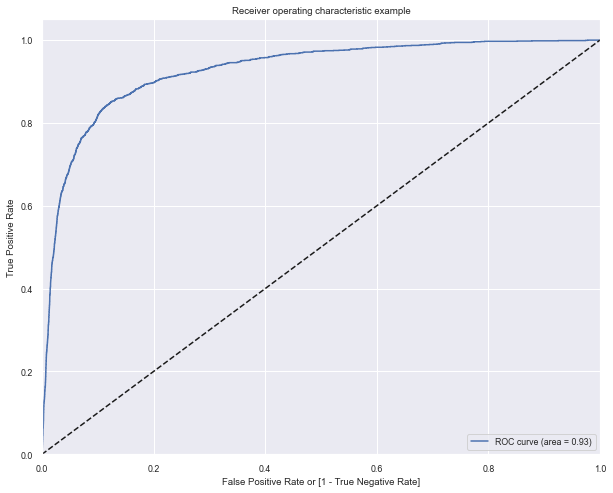

In [188]:
#Running the draw_roc function with churn and churn_Prob values.
draw_roc(y_train_pred_final.churn, y_train_pred_final.churn_Prob)

#### Test ROC Curve

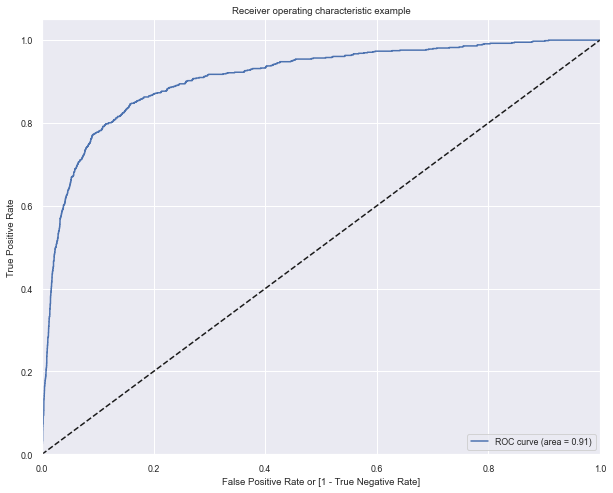

In [189]:
#Running the draw_roc function with churn and churn_Prob values.
draw_roc(y_pred_final.churn, y_pred_final.churn_Prob)

### Calculating the probability cutoff.

In [190]:
#Finding the predicted values for threshold between 0-0.9 at intervals of 0.1
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,churn,churn_Prob,Customer Number,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.01,3167,1,0,0,0,0,0,0,0,0,0
1,0,0.01,44269,1,0,0,0,0,0,0,0,0,0
2,0,0.02,43088,1,0,0,0,0,0,0,0,0,0
3,0,0.06,90567,1,0,0,0,0,0,0,0,0,0
4,0,0.01,44541,1,0,0,0,0,0,0,0,0,0


In [191]:
#Finding the accuacy, sensitivity and specificity for the above mentioned thresholds.
cutoff_df = pd.DataFrame( columns = ['threshold','accuracy','sensitivity','specificity'])

num = [0.0,0.10,0.20,0.30,0.40,0.50,0.60,0.70,0.80,0.90]
for n,i in enumerate(num):
    #Produce the confusion matrix for each threshold.
    cm1 = metrics.confusion_matrix(y_train_pred_final.churn, y_train_pred_final[i])
    total1=sum(sum(cm1))
    
    #Calculate accuracy, sensitivity and specificity from the confusion matrix.
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[n] =[ i ,accuracy,sensi,speci]
cutoff_df

,threshold,accuracy,sensitivity,specificity
0,0.00,0.09,1.00,0.00
1,0.10,0.88,0.84,0.89
2,0.20,0.92,0.74,0.94
3,0.30,0.93,0.66,0.96
4,0.40,0.94,0.59,0.97
5,0.50,0.94,0.50,0.98
6,0.60,0.93,0.39,0.99
7,0.70,0.93,0.27,0.99
8,0.80,0.92,0.12,1.00
9,0.90,0.91,0.01,1.00


In [192]:
#Finding the predicted values for threshold between 0-0.1 at intervalof 0.01
y_train_pred_final = y_train_pred_final[["churn", "churn_Prob","Customer Number"]]  #Remove the other predicted values
numbers = [float(x)/100 for x in range(0,10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,churn,churn_Prob,Customer Number,0.0,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09
0,0,0.01,3167,1,0,0,0,0,0,0,0,0,0
1,0,0.01,44269,1,0,0,0,0,0,0,0,0,0
2,0,0.02,43088,1,1,1,0,0,0,0,0,0,0
3,0,0.06,90567,1,1,1,1,1,1,0,0,0,0
4,0,0.01,44541,1,0,0,0,0,0,0,0,0,0


In [193]:
#Finding the accuacy, sensitivity and specificity for the above mentioned thresholds.
cutoff_df = pd.DataFrame( columns = ['threshold','accuracy','sensitivity','specificity'])

num = [0.0,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09]
for n,i in enumerate(num):
    #Produce the confusion matrix for each threshold.
    cm1 = metrics.confusion_matrix(y_train_pred_final.churn, y_train_pred_final[i])
    total1=sum(sum(cm1))
    
    #Calculate accuracy, sensitivity and specificity from the confusion matrix.
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[n] =[ i ,accuracy,sensi,speci]
cutoff_df

,threshold,accuracy,sensitivity,specificity
0,0.00,0.09,1.00,0.00
1,0.01,0.48,0.98,0.43
2,0.02,0.64,0.96,0.61
3,0.03,0.72,0.93,0.70
4,0.04,0.77,0.91,0.76
5,0.05,0.81,0.90,0.80
6,0.06,0.83,0.88,0.83
7,0.07,0.85,0.87,0.85
8,0.08,0.87,0.86,0.87
9,0.09,0.88,0.85,0.88


### The probability cutoff is 0.08.
#### Making the final prediction on train data.

In [195]:
y_train_pred_final = y_train_pred_final[["churn", "churn_Prob","Customer Number"]]  #Remove the other predicted values
#Make final predictions with cutoff 0.08
y_train_pred_final['final_predicted'] = y_train_pred_final.churn_Prob.map( lambda x: 1 if x > 0.08 else 0)

y_train_pred_final.head()

,churn,churn_Prob,Customer Number,final_predicted
0,0,0.01,3167,0
1,0,0.01,44269,0
2,0,0.02,43088,0
3,0,0.06,90567,0
4,0,0.01,44541,0


#### Making the final prediction on test data.

In [196]:
#Predicting the churn for the test data.
y_pred_final['final_predicted'] = y_pred_final.churn_Prob.map(lambda x: 1 if x > 0.08 else 0)
y_pred_final.head()

,churn,Customer Number,churn_Prob,final_predicted
0,0,18533,0.00,0
1,0,81452,0.13,1
2,0,46364,0.00,0
3,0,45125,0.01,0
4,0,51838,0.20,1


### Evalution metrics for the train prediction

In [197]:
#Accuracy
print("Accuracy: {0}".format(metrics.accuracy_score(y_train_pred_final.churn, y_train_pred_final.final_predicted)))

Accuracy: 0.8651894210150107


In [198]:
#Confusion Matrix
confusion = metrics.confusion_matrix(y_train_pred_final.churn, y_train_pred_final.final_predicted )
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negative
confusion

array([[16609,  2574],
       [  255,  1547]], dtype=int64)

In [199]:
#Sensitivity, Specificity, Precision and Recall
sensitivity = TP/float(TP+FN)
specificity = TN/float(TN+FP)
precision = TP/float(TP+FP)
recall = TP/float(TP+FN)

print("Sensitivity: {0}".format(sensitivity))
print("Specificity: {0}".format(specificity))
print("Precision: {0}".format(precision))
print("Recall: {0}".format(recall))

F_1_score = 2*precision*recall/(precision+recall)
print("F1 score: {0}".format(F_1_score))

Sensitivity: 0.8584905660377359
Specificity: 0.8658186936349893
Precision: 0.3753943217665615
Recall: 0.8584905660377359
F1 score: 0.5223704203950701


### Evalution metrics for the test prediction

In [200]:
#Accuracy
print("Accuracy: {0}".format(metrics.accuracy_score(y_pred_final.churn, y_pred_final.final_predicted)))

Accuracy: 0.8580164554147209


In [201]:
#Confusion Matrix
confusion2 = metrics.confusion_matrix(y_pred_final.churn, y_pred_final.final_predicted )
TP2 = confusion2[1,1] # true positive 
TN2 = confusion2[0,0] # true negatives
FP2 = confusion2[0,1] # false positives
FN2 = confusion2[1,0] # false negative
confusion2

array([[7075, 1132],
       [ 145,  642]], dtype=int64)

In [202]:
#Sensitivity, Specificity, Precision and Recall
sensitivity = TP2/float(TP2+FN2)
specificity = TN2/float(TN2+FP2)
precision = TP2/float(TP2+FP2)
recall = TP2/float(TP2+FN2)
print("Sensitivity: {0}".format(sensitivity))
print("Specificity: {0}".format(specificity))
print("Precision: {0}".format(precision))
print("Recall: {0}".format(recall))

F_1_score = 2*precision*recall/(precision+recall)
print("F1 score: {0}".format(F_1_score))

Sensitivity: 0.8157560355781448
Specificity: 0.8620689655172413
Precision: 0.36189402480270577
Recall: 0.8157560355781448
F1 score: 0.5013666536509176


#### Metrics for the train and test data
- #### Train AUC: 0.93 &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; Test AUC: 0.91
- #### Train Accuracy: 0.8652 &emsp;&emsp;&emsp;&emsp;&ensp; Test Accuracy: 0.8580
- #### Train Sensitivity: 0.8585 &emsp;&emsp;&emsp;&emsp; Test Sensitivity: 0.8158
- #### Train Specificity: 0.8658 &emsp;&emsp;&emsp;&emsp; Test Specificity: 0.8621
- #### Train Precision: 0.3753 &emsp;&emsp;&emsp;&emsp;&ensp; Test Precision: 0.3619
- #### Train Recall: 0.8585 &emsp;&emsp;&emsp;&emsp;&emsp;&emsp; Test Recall: 0.8158
- #### Train F1 Score: 0.5224 &emsp;&emsp;&emsp;&emsp;&emsp;Test F1 Score : 0.5013

### Getting the top predictor columns.

In [203]:
coeff = pd.DataFrame(log_model.params.sort_values(ascending=False).drop('const'))
coeff.columns = ['co-efficients']
coeff['coeff_abs'] = coeff['co-efficients'].apply(lambda x: np.abs(x))
coeff.sort_values(by='coeff_abs', ascending=False)

,co-efficients,coeff_abs
total_ic_mou_8,-0.91,0.91
last_rech_days_8,0.64,0.64
last_day_rch_amt_8,-0.59,0.59
loc_ic_t2m_mou_8,-0.57,0.57
roam_og_mou_8,0.40,0.40
total_ic_mou_av67,0.39,0.39
spl_ic_mou_8,-0.31,0.31
vol_2g_mb_8,-0.30,0.30
last_rech_data_days_8,0.22,0.22
monthly_3g_8,-0.20,0.20


## Thus the top 5 predictor columns according to Logistic Regression are:
- ### total_ic_mou_8: -0.91
- ### last_rech_days_8: 0.64
- ### last_day_rch_amt_8: -0.59
- ### loc_ic_t2m_mou_8: -0.57
- ### roam_og_mou_8: 0.40

## Decision Tree: Next we will try to get the top predictors using decision tree.
### First we will create a new unscaled test and train data for decision tree model.

In [204]:
#First we will split the dependent variable and independent variables.
y = churn_filtered['churn']
X = churn_filtered.drop('churn', axis=1)

In [205]:
# Splitting the data into train and test with 70:30 ratio and random_state=42
X_train_dt, X_test_dt ,y_train_dt,y_test_dt = train_test_split(X, y, test_size=0.3, random_state=42)

In [206]:
print("X_train Shape : ", X_train_dt.shape)
print("X_test Shape : ", X_test_dt.shape)

y_train_imb = (y_train_dt != 0).sum()/(y_train_dt == 0).sum()
y_test_imb = (y_test_dt != 0).sum()/(y_test_dt == 0).sum()
print("Imbalance in Train Data : ", y_train_imb)
print("Imbalance in Test Data : ", y_test_imb)

X_train Shape :  (20985, 128)
X_test Shape :  (8994, 128)
Imbalance in Train Data :  0.09393734035343794
Imbalance in Test Data :  0.09589374923845498


### Model Building using Hyper Parameter Tuning

In [207]:
dt = DecisionTreeClassifier(random_state=42, class_weight = 'balanced')    #Intializing the model with balanced class_weights

#Params for HPT
params={
    'max_depth': [3,4,5,8,10,20],
    'min_samples_leaf': [0.005, 0.01, 0.02, 0.05, 0.1, 0.2, 0.3],
    'criterion': ['gini','entropy']
}

cv = StratifiedKFold(4)   #Intialiling CV

#GridSearchCV with above mentioned parameters and cv, with 
gcv_dt = GridSearchCV(estimator=dt, param_grid=params,
                  cv = cv, n_jobs=-1, verbose=1,
                  scoring='roc_auc')

gcv_dt.fit(X_train_dt,y_train_dt)

Fitting 4 folds for each of 84 candidates, totalling 336 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   21.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 336 out of 336 | elapsed:  2.8min finished


GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=None, shuffle=False),
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 8, 10, 20],
                         'min_samples_leaf': [0.005, 0.01, 0.02, 0.05, 0.1, 0.2,
                                              0.3]},
             scoring='roc_auc', verbose=1)

### Best Params, Score and Estimator from GridSearchCV

In [209]:
print("Best Params:", gcv_dt.best_params_)
print("Best Score:", gcv_dt.best_score_)
print("Best Estimator:",gcv_dt.best_estimator_)

Best Params: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 0.01}
Best Score: 0.9197553026973361
Best Estimator: DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=5, min_samples_leaf=0.01, random_state=42)


### Best Estimator Model Evaluation 

In [210]:
#Initialize the best estimator model
dt_final_model = gcv_dt.best_estimator_

dt_final_model.fit(X_train_dt, y_train_dt)

#Train and test predictions
y_train_pred = dt_final_model.predict(X_train_dt)
y_test_pred = dt_final_model.predict(X_test_dt)

#Train Data Performance
print("Train set performance")
print(accuracy_score(y_train_dt, y_train_pred))
confusion = confusion_matrix(y_train_dt, y_train_pred)
print(confusion)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negative

#Sensitivity, Specificity, Precision and Recall
sensitivity = TP/float(TP+FN)
specificity = TN/float(TN+FP)
precision = TP/float(TP+FP)
recall = TP/float(TP+FN)
print("Sensitivity: {0}".format(sensitivity))
print("Specificity: {0}".format(specificity))
print("Precision: {0}".format(precision))
print("Recall: {0}".format(recall))
print("-"*50)

#Test Data Performance
print("Test set performance")
print(accuracy_score(y_test_dt, y_test_pred))
confusion2 = confusion_matrix(y_test_dt, y_test_pred)
print(confusion2)
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negative

#Sensitivity, Specificity, Precision and Recall
sensitivity = TP/float(TP+FN)
specificity = TN/float(TN+FP)
precision = TP/float(TP+FP)
recall = TP/float(TP+FN)
print("Sensitivity: {0}".format(sensitivity))
print("Specificity: {0}".format(specificity))
print("Precision: {0}".format(precision))
print("Recall: {0}".format(recall))

Train set performance
0.8449368596616631
[[16173  3010]
 [  244  1558]]
Sensitivity: 0.8645948945615982
Specificity: 0.8430902361465882
Precision: 0.3410683012259194
Recall: 0.8645948945615982
--------------------------------------------------
Test set performance
0.845786079608628
[[6974 1233]
 [ 154  633]]
Sensitivity: 0.8043202033036849
Specificity: 0.8497623979529669
Precision: 0.3392282958199357
Recall: 0.8043202033036849


### Finding the top 5 predictors according to feature importance.

In [211]:
imp_df = pd.DataFrame({"VarName": X_train.columns,
                     "Imp": dt_final_model.feature_importances_})
imp_df.sort_values(by="Imp", ascending=False).head()

,VarName,Imp
26,total_ic_mou_8,0.60
4,roam_og_mou_8,0.12
51,last_rech_days_8,0.10
33,last_day_rch_amt_8,0.08
57,roam_og_mou_av67,0.02


## Thus the top five features according to Decision Tree are:
- ### total_ic_mou_8: 0.60
- ### roam_og_mou_8: 0.12
- ### last_rech_days_8: 0.10
- ### last_day_rch_amt_8: 0.08
- ### roam_og_mou_av67: 0.02

## Thus the best predictors according to Logistic Regression in order are: total_ic_mou_8, last_rech_days_8, loc_ic_t2m_mou_8, last_day_rch_amt_8, roam_og_mou_8.
## And the best predictors according to Decision Tree in order are: total_ic_mou_8, roam_og_mou_8, last_rech_days_8, last_day_rch_amt_8, roam_og_mou_av67

## From the both the Logistic Regression and Decision Tree we can arrive at the following conclusion about the predictors:
- ### total_ic_mou_8, which stands for total minutes of usage from incoming calls in action phase, is the best predictor according to both models.
- ### There are three other columns which are common among the two models: last_rech_days_8 (days since last recharge in action phase), roam_og_mou_8 (minutes of usage from roaming outgoing calls in action phase), and last_day_rch_amt_8 (last recharged amount in action phase) which can also be considered as key predictors.